# Day 2 

In [1]:
input = """116	1259	1045	679	1334	157	277	1217	218	641	1089	136	247	1195	239	834
269	1751	732	3016	260	6440	5773	4677	306	230	6928	7182	231	2942	2738	3617
644	128	89	361	530	97	35	604	535	297	599	121	567	106	114	480
105	408	120	363	430	102	137	283	123	258	19	101	181	477	463	279
873	116	840	105	285	238	540	22	117	125	699	953	920	106	113	259
3695	161	186	2188	3611	2802	157	2154	3394	145	2725	1327	3741	2493	3607	4041
140	1401	110	119	112	1586	125	937	1469	1015	879	1798	122	1151	100	926
2401	191	219	607	267	2362	932	2283	889	2567	2171	2409	1078	2247	2441	245
928	1142	957	1155	922	1039	452	285	467	305	506	221	281	59	667	232
3882	1698	170	5796	2557	173	1228	4630	174	3508	5629	4395	180	5100	2814	2247
396	311	223	227	340	313	355	469	229	162	107	76	363	132	453	161
627	1331	1143	1572	966	388	198	2068	201	239	176	1805	1506	1890	1980	1887
3390	5336	1730	4072	5342	216	3823	85	5408	5774	247	5308	232	256	5214	787
176	1694	1787	1586	3798	4243	157	4224	3603	2121	3733	851	2493	4136	148	153
2432	4030	3397	4032	3952	2727	157	3284	3450	3229	4169	3471	4255	155	127	186
919	615	335	816	138	97	881	790	855	89	451	789	423	108	95	116"""

In [2]:
s = 0
for line in input.split('\n'):
    row_numbers = sorted([int(val) for val in line.split()])
    for ind, divisor in enumerate(row_numbers):
        for divised in row_numbers[ind+1:]:
            if divised % divisor == 0:
                print(divisor, divised)
                s += divised // divisor
                break
s

239 1195
230 6440
106 530
102 408
105 840
157 3611
122 1586
219 2409
232 928
170 5100
132 396
198 1980
232 5336
176 4224
155 4030
95 855


226

In [3]:
row_numbers

[89, 95, 97, 108, 116, 138, 335, 423, 451, 615, 789, 790, 816, 855, 881, 919]

In [4]:
1195 % 239

0

# Day 3 

## First part 

New approach and insight: start at the corners every time.

In [5]:
input = 325489

In [21]:
def generate_spiral(R):
    """Generates the spiral up to radius R.
    Returns a list of complex numbers (x, y coordinates)."""
    spiral = [(0+0j)]
    for r in range(R+1):
        corner = r - 1j * r
        side_len = 2 * r
        current_pos = corner
        for side, direction in zip(range(4), [1j, -1, -1j, 1]):
            for step in range(side_len):
                current_pos += direction
                spiral.append(current_pos)
    return spiral

Let's plot this.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

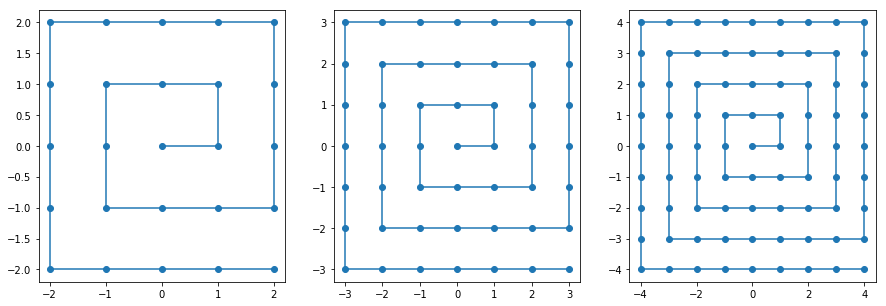

In [24]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)
for ax, r in zip(axes.ravel(), [2, 3, 4]):
    spiral = generate_spiral(r)
    ax.plot(np.real(spiral), np.imag(spiral), '-o')

Ok, let's now generate the spiral and check when it's bigger than the input.

In [28]:
spiral = generate_spiral(400)

In [31]:
spiral[1]

(1+0j)

In [33]:
spiral[input-1]

(-267-285j)

In [35]:
abs(spiral[input-1].real) + abs(spiral[input-1].imag)

552.0

## Second part 

New approach: build the sequence incrementally and add the numbers above and below by looking them up.

In [37]:
spiral = generate_spiral(400)

values = {(0 + 0j) : 1}
for next_coord in spiral[1:]:
    neighbours = 0
    for delta in [1+0j, 1+1j, 1-1j, 0+1j, 0-1j, -1+0j, -1-1j, -1+1j]:
        if next_coord + delta in values:
            neighbours += values[next_coord + delta]
    values[next_coord] = neighbours

In [38]:
values

{0j: 1,
 (1+0j): 1,
 (1+1j): 2,
 1j: 4,
 (-1+1j): 5,
 (-1+0j): 10,
 (-1-1j): 11,
 -1j: 23,
 (1-1j): 25,
 (2-1j): 26,
 (2+0j): 54,
 (2+1j): 57,
 (2+2j): 59,
 (1+2j): 122,
 2j: 133,
 (-1+2j): 142,
 (-2+2j): 147,
 (-2+1j): 304,
 (-2+0j): 330,
 (-2-1j): 351,
 (-2-2j): 362,
 (-1-2j): 747,
 -2j: 806,
 (1-2j): 880,
 (2-2j): 931,
 (3-2j): 957,
 (3-1j): 1968,
 (3+0j): 2105,
 (3+1j): 2275,
 (3+2j): 2391,
 (3+3j): 2450,
 (2+3j): 5022,
 (1+3j): 5336,
 3j: 5733,
 (-1+3j): 6155,
 (-2+3j): 6444,
 (-3+3j): 6591,
 (-3+2j): 13486,
 (-3+1j): 14267,
 (-3+0j): 15252,
 (-3-1j): 16295,
 (-3-2j): 17008,
 (-3-3j): 17370,
 (-2-3j): 35487,
 (-1-3j): 37402,
 -3j: 39835,
 (1-3j): 42452,
 (2-3j): 45220,
 (3-3j): 47108,
 (4-3j): 48065,
 (4-2j): 98098,
 (4-1j): 103128,
 (4+0j): 109476,
 (4+1j): 116247,
 (4+2j): 123363,
 (4+3j): 128204,
 (4+4j): 130654,
 (3+4j): 266330,
 (2+4j): 279138,
 (1+4j): 295229,
 4j: 312453,
 (-1+4j): 330785,
 (-2+4j): 349975,
 (-3+4j): 363010,
 (-4+4j): 369601,
 (-4+3j): 752688,
 (-4+2j): 787

In [39]:
for key in values:
    if values[key] > input:
        print(values[key])
        break

330785


# Day 4 

In [40]:
passphrases = """kvvfl kvvfl olud wjqsqa olud frc
slhm rdfm yxb rsobyt rdfm
pib wzfr xyoakcu zoapeze rtdxt rikc jyeps wdyo hawr xyoakcu hawr
ismtq qwoi kzt ktgzoc gnxblp dzfayil ftfx asscba ionxi dzfayil qwoi
dzuhys kfekxe nvdhdtj hzusdy xzhehgc dhtvdnj oxwlvef
gxg qahl aaipx tkmckn hcsuhy jsudcmy kcefhpn kiasaj tkmckn
roan kqnztj edc zpjwb
yzc roc qrygby rsvts nyijgwr xnpqz
jqgj hhgtw tmychia whkm vvxoq tfbzpe ska ldjmvmo
nyeeg omn geyen ngyee rcjt rjuxh
qpq udci tnp fdfk kffd eyzvmg ufppf wfuodj toamfn tkze jzsb
rrcgxyp rbufd tfjmok vpyhej hcnz ftkojm
jnmomfc jnmomfc bkluz izn ovvm flsch bkluz
odisl hzwv hiasrhi hez ihihsra qpbmi ltwjj iknkwxf nbdtq gbo
gjtszl gjtszl fruo fruo
rdapv gaik cqboix sxnizhh uxmpali jdd usqnz advrp dze
flooz flooz qad tcrq yze bnoijff qpqu vup hyagwll
lnazok dze foi tqwjsk hpx qcql euzpj mwfrk
ilb fmviby ivybmf gtx xtg
rpauuu timere gyg wcolt ireetm safi
croe szwmq bbhd lciird vhcci pdax
hnc ykswt qqqmei goe bri wmyai hnc qpgqc pberqf bzs
hsnrb wdvh iezzrq iezzrq rdbmpta iezzrq kemnptg alkjnp wymmz
ngw don ddvyds nlhkoa aaf gptumum ugtpmmu
vmccke qbpag kvf kvf tgrfghb kvf bhpd sglgx
obomgk bkcgo yso ttft vbw ckl wjgk
fli qvw zhin dfpgfjb udsin nihz ovr tiewo
tgmzmph hauzieo jmg tdbtl lvfr qpaayq qapaqy ausioeu jun piygx
jkp guqrnx asdqmxf vmfvtqb tloqgyo ioix gajowri tmek ilc puhipb
uycn zxqm znft ayal znacus kvcyd ekv qqfpnh
fqghur xtbtdd ztjrylr bpuikb ziyk
rvakn uqbl ozitpdh uqbl dsej xehj
laxp haz jyd xnkrb ijldth woy xapl iqgg alpx gnupa ukptmmh
dyiy dyiy ihb qcyxr
wbwkd hdwu zvgkn hdwu wjc sakwhn zxujdo npllzp uyr uyr
fxczpmn cininu akcxs ggslxr riyxe ojisxe
ppbch sampq dnct afikor dnct edsqy pnzyzmc afikor
jnvygtn hijqjxl vsd jnvygtn nqcqv zns odq gkboxrv kolnq wrvd
mroq mroq flsbu flsbu
fyshor xvpaunj qmktlo xoce wkiyfu ukcl srndc ugwylwm ozcwdw mtqcste kpokr
cfh cxjvx cfh cfh uewshh
bpspbap bpspbap fquj mxmn bwls iirhvuk dmpkyt exrn mxmn
tvyvzk ezszod ntxr xtnr och
knfxhy kbnyl knfxhy xhkssx lxru uprh nkxpbx oodolxr tpvyf
nblmysu iwoffs upgof tyagwf aan vovji ajk ywzq oyfi sfulz
aushzkm lcaeki mkuzsah ynxvte rsntd refk pcm
mgguob gobmug dzenpty gmogbu
yvq eepof rgnree nerger fpb stfrln ernger
hrgkbl mzwvswk rsrsbk ieru holco pajvvn ztgsr qkyp fyeg owpcmoj
fowda gmsqdca yugj mcrroxv mqcbojd fjnqfji qdfsc jqs
qnc rvjfz vvxk sjd xrma ucdjvq sbw zydyt dfzww
ocajazv cozaajv tqunkla udwf ecnnmbz lsakqg bki njnda zsdu ccfqw rxpc
qqm qdfya qxyx qmq qfday uqnfttt
rnbirb iapor qet iapor hxkhz dfvzig pedl ybyb
mkgamxg xkniv meb hbzmxjn dhbj zhbxjmn hdjb
ilteux pyutyfx mau lrr bacak
sjjonmn dbbbgs crxyuu jztstgd ezb uiabyaa
tra fle ufzlvf nnaw kec hiwnnlj tei wld iyt syk hjdczb
qmd jtlud dgh dbanock fzp dsjgqru wwvo jwvxwgv xlemfij jcacd
rpkx oxesil snazcgx fly miiyc ikmtmp oefyyn egbw
ypfpeu wldnyd acchppb yqwcaw wldnyd turbz megci nbgxq xkc ypfpeu
iqqv iqqv neui iqqv
ypsxm icqyup zyetrwq nbisrv
viommi toszx dpueq eyy cunjou ffcjc jaeez djefra pxvkj liudlig yye
fhnacbg jghchh ghjhhc iue hwqmo
vbjw lpn cizba ltnsfpz tzoweml irewlc uzckhpd mszal obd
yeos utxkft hflxkfe fxczge qpgigkc ksgr vuumql vhlvv
xzmkv xzmkv krecdi klpem jsbu nwcmik emfzxf cjmpgnj
vtkjo pmiv zou gxo qdiyxsf hwyinjk jhkgf rjq
dyuoc ywiyvch irfgl ywiyvch fxb fxb
tuz onhr syu rqya abkaf bcfx mbknex juwoor zmksl
oheg spjorx ksdy vwtq fxz phvtazk tcze lrxg
hew lbup botaj ltr jpd
dxgc tzinkej gnz hxvvub adsqmc dxgc asgpp rqbdcra goy pmamdua bhiacva
xqv ygb kihxqz vyv pjcny vmyvsdv cgsi nfyx
tqga ssshrw ndq qlbvwh huyd pxbgj qbxk dkkbf jxy chsobw pph
hxl iwph iwph xnr otifm ljhre
zlgvpd kapxpoc dve rklk ogh hgnp rbrmc zzkz hhmcx aklmo
sar gfor nkf hek nkf aql shc aql
dtcrw kfjzcjx qyhi bldson whwdayo mqtgt xhqzp ttqmg
omspdml isze jdl nvwo qrkm wztfg ssfgyh dryj jhp unsmty
jxt cszylng ifht ixtuna azoi xutqlv jtx tjx
usgm azuayp fgkby ezpyq jqwl ezofj
tnhvil nrvg moyrpqs sldx qymoff megflxh pyhqwms xmdw
zomy zcquwnv lzx bvcna yods mjp dgsez
blklyf xokd gpit tiysj yrwfhm tofx
dtig vhdp omuj vhpd
fogwxim qvdwig emdiv jvhl euwbzkg xvxb hwmqo ujdmlp epmykj
sjxll sjxll pedvgb sjxll
drvay gtzhgtx yrt okz nqf
haxfazn pvkovwb pgu tgshw mxcjf pbe nwoymzc mxcjf pbe hydwy jradcr
prjsloa ahylvj okbsj qbdcdjt pmfo pagyoeg vkmhjzt khzmjvt opfm xfrji gyjqyel
lzypt jdbtrad ogr jdbtrad heink
rcoucuq gdxewa rcoucuq whlw zhhm rcoucuq azaqohe mzyli rdvaf
yuag ebcf yuag nsotg qqzuxr jfmao vyucw wmoye
qwvk xemm hgqrr wyxkpp tojndm xlvzypw jus bgnu bgnu nklfwhs
daqi knenmku ccm xkiuy vkexsbc kvvdagx umopitw yaocnx yoakqql mllmsp
mrxgl gywit mfopia ncnsvw vdxek axuiot rsejua nei prndudz mnu
egqn gaa qgen urs mix zbn rhn
ewharq aihy udkdaob kgrdd kgrdd kugbjtj fcef llqb pduxaq wcexmm
dwtiw nelq hppad algxgf gcc upou akm efnb mxmhrud
yxqaa ups okbhgt iet qns tqn rnjqxgp
npmhdm cgds ldexvr typi jyivoqk zkgq vfyxu xgfo
dkwnmr umm dkwnmr okpjw wqx jpztebl eqsib dkwnmr
dxbild wpbup evscivq dxbild dxbild geqp ojfbpl jshvqej
cxdntxs csfocjd pyy tuhws teb boyloz xfw scxh pxhonky
lteucke xrgwy hszgzu hnyrcvb
pfgsgwg dxzh fworek qbstod
usemcrf psczxu gcjtr brls
hjol efxczux bqdn gvrnpey yyoqse gbam ndzyj lbwb bhzn unsezg
bapw xifz blupk qqdk bofvqpp wnbuwyt rnwocu lzwgtt zucag pov
xkre lqvd juf lqvd xio xyg xyg
tzdao ztheib aymcf aorg iyawrch hetcxa iyawrch czdymc ccv
ucgl azlppu jvxqlj pest
dvwlw fuuy mnhmm okrp ualnqlm uyuznba fzyejk yaq crl ctprp
odfq knox mkbcku pxucmuf lpjpol phl
ixongh hfs ruorbd auy qyssl kykwcix aytsm rlj aytsm duq segpqhk
izufsk wedpzh podjkor eamo vqvev ifnz podjkor xrnuqe
twyfps bmdbgtu qye qkwjms
wlav htym vhsnu cocphsj mdsuq vhsnu jflgmrp
opajag itwjhfu purnnvk opajag
hpkopqp vnj aialpt lzrkzfs nwucez nwuezc
mcx hzcjxq zbxr dsx tpknx fva
rlvgm xrejsvn ghawxb efyos xty wdzdgh olahbtn rga efyos vhtm nsr
cni mbab qtgeiow ulttn rckc kmiaju jvbq emyvpew cdlxldn ulttn brhkprx
eykpffp rapik qki fhjgdyu tome ehjuy bibjk htxd vexvag
wrk dpxt gwkuiov gbkif ike gbkif pcd wpj toywyf qzsa aol
yqwzh uujn ujun ujnu
srs ralwxrz yxvvmgp sjhbhk waasid cqtxoxf whcladv jkmaq khjbsh dlavcwh
mdvsjh xaj etvxlsy fxgiy rgjesel rlegesj ptriz ebdyhkp kugxm dxv egljser
lhehwrs mqevb ygmv gri izop qgb ivm
loqqam alojlwg hgen hbyw qlwpun loqqam worgnwk kope
phozre todsknr todsknr ibj mvllsar
wuripy ruwlfbh wukbkey qhq iishw tvtvci xawvxc vxacwx hsiwi ogq
xryq vxwupqa zhqex aquxpwv bnvxrba dtbxki
yvvwh zvsm vqskhp vqskhp ggqqlw bpn wbuv
kqz tdy goqwge ygn jgd
szjjhdk zkpoo nxexz ebicc
wzuemcj oyd qupulju iaakzmt vzkvz
nppahov umm wpzev wxkgfxd owgekp bhhb bbhh dgviiw kdfgxwx wryb
bnc rhes lmbuhhy kwbefga bnc rtxnvz bnc
ani mggxf mcoixh zdd nai hbhzl mes bdpqr
mjn uinoty jjegvze bjgqg yhqsxbt coj obylb hddude xqi rhfbhha alood
cbjzj drmihy tfkrhsd nuhav hihzx bvblqpl tdd szmp gjgfv box
uumhdxd cmwgyf vepr rwqdkj exwk
hwvr ydvw bqefu kghes gvbhp awms iqsqes khgse
mrey jqfw fwvzhps komj dayvs fbui zmtd cofn mrey
dsjds fdpx irjj usndok qcctsvf fgk wvg txwxcl dxs llp zyilwtq
xmkelgk fdukc cye legkxkm wwly
enlny eynln cccku brkz dpof mwfoxcd yftmnqh wpebvyc
ggdn jnysl dsacffw ukj hdae cmzxku
uqhm gcachmn kxndfrl htmfis jfnajz fiqiypr kekho kekho ndcw ckrndub dejfna
keazuq ertql rauwl keazuq obmh rauwl ksrotm
jppp poigqhv repfsje grjk xwkyuh pkx ayzcj hoxzv
yhjw pcuyad icie icie icie hwcsuy wcd yihjh jnrxs
gaug ivvx ceb xujonak hbtfkeb ttciml cctoz
dggyyi dggyyi gqlyumf yasu fwdfa cbb nncn verhq
rhgcw gpcyct kiuhbg kiuhbg gpcyct jlmleo nhumm
wulxxu jyjek hclcp ogob viex wiqcupq
tthu nxgzpid kcnj mss ukapgkp nnc bxjocv qwxs oejwsif aywqtu brahkb
dtde bgvb smu vbbg zhlu
lyo nwjjmep ldbok wgxhto wwuh qfgjknk wnsl
lleyr onha hkwulbm jfg
bybjwd uoxvbh mvj iqfpnxs bybjwd zqtszp wvc lbazjr zkzenja cev
rbuyyr divtslq yuqmyt ajyveb smxsjb nlk tzqhq ims fewg wpjhr gqh
kpewfd beq klilis klisli eeezut
euqh hueq ldoo crqurv lvrwh tmaewp oodl
bqi lzrf jyhvxfh bqi jyhvxfh nbztd lwpdn cuzi
srjylou phavzjd wost uxkaq byh sluryoj
ihrdk bcegkpq nygrs qbcq wyjg dvzme pgzhjl vibg kvv
ijsx iedemek ktlz gtga tbal lbki gtga
vmiaxn kefig kefig vngxz
vrdmfvi qts vlvhq vlvhq dihmq
cfz dyrz zlw qnt vok fwvahg skshbqf hbwozdc ntana jdb uflp
rimbj bxemw sfps krtk umta vnk ewmbx nrlje ymrtqrz mxewb kjxunbt
egnuti ozat eltl ngueti
qtcwoxq rmaf qtcwoxq qtcwoxq
zws gcoa pydruw qsrk lrkybdf ugr wkrxoj nyvf vitwn
tmr hhd dojid zwrj bhsim righ keqlep flzunou
lwoquvy acjowxk tqudk oenvioh nyavyl
rgh dfhgyke iff cpxhuz hui koe iff hui dmukrei
bjiumig lcbmbgh vleipx sfawua rnf
gftfh qwb tfdroe xbno qhgofm vqfoe mux
ljdrr gyfggai iun nju xrucbis mhrcrh fukr obvuqc whlalfe xrucbis nju
nxjmjr egqwg arllu xqaahri lzc ivt uhsti
sqiepba rcmts kvesv nvp
tiksw tiksw rjni gbhvzm ctbq zuqfyvz
ibsnm kfka aoqigwo sqouih rxz
jmymq lxio adtmk umyu sxvzquq bporqnb heol fow
mepa eckq rqviawv dkqoei ifmngpp jiava rtklseu
yuycd jiufjci yuycd uowg yuycd udq izkicbr csxobh
nwu tfsjavb rruoxbn oepcov elxf rruoxbn rruoxbn azglwth jcjm ksqiqpv
dthfwip zqnwa zqnwa zqnwa
gso wruece ufl crgnlxv vllsm dpyfm wpa ctxko
wvpze seodz lpq lpq pmtp wsxs ffppx
yfxquj phvjn rtwieq rtwieq kgxztyu vbjvkc prqqd lyzmdo ojbrt ojbrt qiqjz
esaezr rpggiy jey kbzrhu uthus osr xxaiijd qfxlf auhzbx gkigoqw
yfhcj uvgck cds gjhhrg cmempgj yfhcj cjb
yxi voxvtuw unwg jqqm
igvjr ljz rus sru gbjtjt qfeg ztu zjl
leof ocxns hbkoysh hbkoysh leof
hab lyxmf yhh qeks fwhfxki xmbcak okqjii nfgzyg bhtfgdj lpmjn
mgognh tad herere lvwnzx ixwqs zphmuuc etdjz kczsf
mtej rlolsnn zbl uykek dpkan gmz etxtgj
mihuieo emjgbp jgks mihuieo iexrfw mjdnr bvp mcuzea xkbusvi
jvqpj bwt jvqpj bwt gxr
qpnd fpt tpor bibbpcg hmvguez wqc afl ckviua gpi
dntmcg jglm sxtnu sxtnu sxtnu
fzkbptw cbfwo ozvwov wbv gcdd izqo ovwzov lolewo xikqpw
nkxyxzd kpn datf fki werq mwidqx oiibor zizcjph
xvgyxym zor ijoy lvwsf fjuara idvvq rreit mqyyy ctio tzwqqhj rnpee
maqkfpk maqkfpk xukg sfdmnlg xjopvr xjopvr irf
liujcd vnlkouy dxkwc gto vhjvtw
swhqhj cas aupsd swhqhj cas bvbooii jquck dtdm
igh iqicicf ghi pcxt srcrjx gmf gyscphv
drplj drplj wopgpnk wytag wopgpnk
zexe ilcqoh qiefb txkuv lirfzv
ovvpn ovvpn uqeurqx uwzn hgmucj ovvpn sjxulms
rox silka irhsvym kutus otasof tdneav pcagds
mkja omu tyshbfq onp trxs lxa tftbv bnpl djhnc zdqfs muo
tjj rmmqas cbbkxs qio pikk ykyew gxlxt nhsyl ykyew
frcprg njrz oaxcmhc qben pedm ecvtga nzxwpb ior gaklot dpem
zyt kncau spoe qlchg sqys wkpbng yflju qlchg vkve bzadbpa
qtq pkaicl qtq mfkfqvr dnleiq brrjxsx uoyxh pkaicl yvmlug
firwy imtlp ywl qfa dqrbazz ztzb pcsbwhn zesmlag
ivey ivey mtvc mtvc
lhize acwf moa cdeoazd voktshy qmvqq jvmuvk ljfmq tsanygc
xreiqkc aawrovl pofcsg xreiqkc xreiqkc
cjbzvn ozds iniqu sdoz gqmki bablvll krs vjzcbn
izsod htkeqz entxn qtns prpcwu omfnmoy
kwfb tctzda aztctd tadtcz gyt wunbcub ydiwdin xxk
epnl ijcp giq ltfk zjcabve zfksmz epnl giq xxxbsom
ulyukpa mdjsbn dydko uhkdt qms aaaj hustlwu
zlsbu ohx jcwovf egf zlvpqgx qhejm wrywdmw
uhxqrzr mmu kjxcalj unuohiq rri yzngnb ikvlxry mfiym qbksdx
khqciz som yklmm jceb khqciz jspy jceb
ncwggv njvi nqox krtsn lnm
bgtqme xaxcoq qbtgme obqual vorfk baoqul lgrb
jli tsbb nlxjc pkwzmz dlxrj hmho gzguko ilj iyaasm
wlmw grkumg dynwtyo emxhhqr huluk slpqu uhqcmd absmr ufirmwr
pbs pcammxv dplfr tzvmav nccyy blvyq ffhnz bccutq
hgge ghge vxmvz hqxgjdg zab guo gheg
ylj bucoyoq udndc wpgyrbx ueh udndc gxdsdh hdoz wwgqlg
cjdeh gttyqe kdkm ltzd lfeozse quvjq mnwhokm kdv oojxm nxt
mfkzus knqxt saxkqww njx zumsfk sbmcyad cpt agvbuv
tukn vyco yobvsn bzgnn klrnzy kea thzk pxpwq ryfff nxzm
ylbm lxlz lybm lzxl
wgtxoij zad slgsi cvnxfg iomswwl vmx
hkm yinhnkj kmh kwkw kayknck chur styjif yknakck
rtfwhkq rtfwhkq zsf zsf
sldq zlntr ueegiw kajivqc ozcbm ceft snvugom pdyc elppeed nnqrp prwwf
lhk xjonc muc tudag tsafx mmivb dvrjbp qgrew
hnzer fbgqp aazta aazta lxaz lmgv aazta
victgxu victgxu mlpd ummrnbx cazjgnw isxcyp efy zfa cyusj
gyojxo onzq gyojxo uxufp awi ilhl wefwfxr gcjlt tmliynw uxufp pdcnxah
wjwachn xkuhfbp oky oky ybaeqkr rbuix yreoaw wepmye brvon aasb
kiidorw vxtxiqx wtqvbrv efdth isel qbom vcssyc vxtxiqx wtqvbrv riafzsw mqzsj
eurpjd vkhdamt tmfx czeoot hiz ykz lmixzq tfur jhzr
ipuftpj qbll sqkkdw fwncmiv bri oeeh lehd ioh wag
suima nanngc imrmc krq atxdo woy atxdo akev qlr aezco qlr
cfc efwbzck ozkmcxv moczkvx ccf
bnekky iakrk sask uwgnjp iyi rynev bdnas ldh kass
sicmw vvjbvv cap nsumc xgvrlm wsoo uoqdu psykckm
ugg mtr wnzhmmh tjxc ehwnji lwhu mdsckk yvmk enubrqo
grb oxmxz ohu ytetedv ssx apzlppg fdkamm sxofc jdt ynmu wyejok
umoep rbyqm eqfk twqnog cptbbi dragna ngqs ffb cexxnc rbyqm
utizi ormkel wvwur bdx ecelqbv xiccama aag glfvmj
znb rsuqoa uxo svc
obs lbifa cffi catpd
qkxwian ajlzjz wewduzp bbyv qmt fsr qgiu epinp ghmf
hatg bfgmb aght ghat
kuq inp dun cknbun wmwsu drlmmg kyxc bdl
bddybth swdbf jhi fva qpobio bjwm wjaztp jywi
mgckz vhveu zkemhp zdf xtiqqew mlx wazgd
umbjq pya lvvxf jeavij rhrxvew bwjqgpr piz
xaycpwo vjcuc qksc yuixhni sfbfb dydyaq gdfvb tggg xidphvf bpjdrl goskxym
agxfoip gguif wvo agxfoip ntkbaw fbyggy ooft zxih
nzvsu ffwq uxvfbl qrql olhmhom qhdltg ymwz krtndtx olhmhom nfsv krtndtx
qdp jqk ustz xjripzv mnk grnodk pjwdsj uug zqxjqj
mufrcox zunisfs ocvcge acamm xua vor bsde kxr vor kxr orccxx
ncycbp anvcxay bmm wndmeaw oso knmk mmb wamenwd kmkv ppdd
motdcn xzagzwu vuzt utffrn yuqxzrh uvzt ujttq
tauoqy coiy ybesz tauoqy wpmr trquyne ahxbj jzhems dsdy
aczq ypw pgmzz srfn quatjgf
cih ypapk bfxvr euvhkk gugru auhqui
vyf pssgfvy dnhvbfl xpacme dnhvbfl mzdv iynq hcqu
lbzvbu hhxiq hdfyiiz iyzihfd xhqih uzdqyxr
iapbdll vdr cprmrkk vdr dfjqse mlry flpqk vdr
grrfkq xcpxd grrfkq dxc bjpr prvwh swoc swoc
bopo chvwuhf qhd ieesl xey ieesl fnjcbe
kic fyq hsucnu agwyl pzzmd hqksh psw
mxf uau iti lcoz lpg zbu ocre wqlocmh mxf nidqj lcoz
bypmix ptzxgmf xmtzgpf hrvzzq
lbfw zwusma lbfw tuyyy
lrf uej unswvh obgsb npbl zajr kenea uej qnyjcu wzufim qpzkgya
qcrxj llyu kligt hlm ehwtbx dda lgsvhdt xewfcv uikn
nfzjx izqdbq mfbxs imiuc yqxb xlmvix izqdbq eflqfq wku omgtuu izqdbq
lasdwg hiy btzt eefd eyoep icn nnmhg otml rek luixac nyzgn
vekteds utsuxdx utsuxdx vekteds
feyov qrij zbebwg ijrq seplram wttkwm zewbgb kzuhuh
dmkgtv wohgqo ddtqmv zatahx mym hqowog tkmvdg
vhha wjrmuyx kqh vyyrj xzchbi ejsdq orlxg vyyrj dlrc
yetngqn zdtuqox hkarjei fqpsgh eaqwbg zsssog ghb gddqqzr hbg
obldb zsrhz zxp uxphnev mwnbc pfjft fms xwslk vjm fxy
nfij dbfykv ttq gyjgac igxuyqi gtiioqx ilhdex dbfykv uyp bdiwya gqf
pffzruz vogfosh dcs wje
pohhf fhpoh oon yyz
xxuam afwm qxl lnt syyr bwxhhf sozauq shlhfmz kwnn milav ochq
wefcqrt gejw cwerqtf fttf gjew
jfsvnmr osca epwtle pgfif sxom
exlfzmq nakp rgdnx rrcvth vhrrct aajjdrt ryyg dsozd jdqlqj pakn iruv
rmcvo txszcs xxhyxz hbsozk wshkocf rmcvo rcbnt
kitz yjgney yvkymef nauj hmllsgl kyhm kqr pzsu rcf pzsu qpte
cdinpx bfur mkj naz ihkheyr nohhoe
ylris xeqcgup wap bbfih tgfoj
ina gnlnm zyeqhij cudfuf ipufae bvkdzni aat teqsg cudfuf bjokrbl teqsg
aedx edax dnfwq qndwf
rdngdy jde wvgkhto bdvngf mdup eskuvg ezli opibo mppoc mdup zrasc
qcnc iaw grjfsxe gnf gnf
zbjm snznt zelswrk gkhlnx dqxqn qqxnd dmro
zisecvx ztezof uzbq otnrtj qsjzkwm ewvcp rlir bfghlq tgapdr qxmr
ipnqj opjf vabyoe wkwnd
wyf mfqxnrf apm snarf jqu aaghx pwecbv lvghayg
acncv jmmbwlg oiphlm ifuo cvt
pvmb egansnd zmh gcuzzci rrxpslv ubith
uoleptg xbouzn xbmg cfh cpn wpqi xbouzn xtxis sxzpns
rilybri kurbpq vfmjpck tjyogho hfyxad svfofx lfbbhxj khaerfs iqr
seaebgz wlmtkre qguv qguv wlmtkre
sgo edkxya zdqgwtt gxu nibuu rairqoq mzxli dci qsv
tsol mdhzqr rmaqnru ggvcq arbwkn hlkcnj ljkcuof
mmliphp ocup puoc eijjv
gmajqpb ijki ijki kvz
pmqss unhlpcj dlkll nuhlcjp expe tlurzmv nsy vlumtzr tgseozl
gkvaoni hsba hsba viuedv phyoclp fdq phyoclp febld nqfs
rxvdtw abn pntv qrqfzz slsvv abn lrxix mnu npot
ghlfjp woy xwkbmv bkahpkj jve cncvk jvdype fwgvoju yrkwjp gwfvln mvkv
kmluh mie bby fwer chsinb ojglqr nqk mie
yzmiu igkgca ybnsqja jpfejtp yjddy xsosxfi ingx qwuhb emrkwpx idqjmmm
btrllw mphm dkvo ewdl dchcul yah btrllw kmqi mtvgk wtb
hxsgard yuikc lykt tdee adprp gpougod klnzk mzsmlb
hdn znblw ifoblur bwzln dbv
smofpbs vjuyiro llk lfzesga tybu tybu
gffnpug xaup iqiyz fjkpnkz drrk fwyxw lwzfskz gslwpmv vjxylva tbkyo nib
evydmb nhwuiiu fkerq nkgbuyy uclrs ydjgglh xhotwbm riirgzt
bsub eavbt uvd dpzwyt rhn khrbptt xszckc djnfxju axofhat powmso nvdffrv
xtuykl fjz mbikc xpnx hmey fjz fjz
rkls nwdcsyx rkls rkls
tygml untequ ybdfumz nqffbq uipc sove hfnqj
ytecew vven koqn royynd qsn ksl qsn sdw
hknlw qwho whoq oqwh
lzmmtqu qvhyeo cnofuj utpwkjz gnirz yhhu aodbnd
zsr axw kwtzcv tydzo kwtzcv lkxsm
rbjtqe nihifd gvdxd bpxzy rxteky vgcgllv vbbua anygiup rqo
dpd wblfwp wblfwp wblfwp ygahc tqjbaq
gsw gsw pacgj xmrcz zmxhmch xmrcz
pdq rhe xqmq lgpkhg fyffrot ovnqh wle
tbjavke ypzzrj jizx gdxoh icjsat otfh fmygumv
snch nxlgjgp jeyn sxoqfj jtage jtage iuice
rtb coefuj grwg grwg rtb krhqnma vfhgbr
vhegtl btorwxg szcev kbvkx itsk nlzpbed
hiukrf ilzkm yllhh xsgwkdp zyy kjbv
rfcg tdorci zcj wzftlv rfcg rfcg
lgbc lzizat vsno pau nvv vsno bbr lzizat qhtb gwp
sfwnio tcugjk bsfsz ykyfwg ibkap fsrvy mygk kzunawx zyhyh
mpavlh qps bylh lttjkz rqabgk vewb bwev tlzkjt gzrbxga ktmso prpkj
gpf ims ynh ffrs vpa iemp gofh cgbauje
secys qks mcnfhwh drog kqs pajy zoltkw lfihnb myb ioxptu
ytq nrta ouk ajqblf yuwwcd zdy blyoxbw dakk nvgi bzrhzaa
nkoych sufiia xkdvw crtldee zycl qblab egqhr qblab
nllno muxaf vds qjnitmw zkpj wskyhft kmqct xamuzpw qcai cdjtbt kaxv
qzdytpe osr fuw osr qzdytpe whperd rydwdcl knoa
zkdznhd peh duoygr zamrgl irnvj otpe pltpq jdkecg
byzgw rece iigdug ehif tpgje
ccnn foqdran gbctca tefdjxh ntcr rjciii xip xlss crl wvvhzqm twyohf
dqyii milqqc qjgkojp qjgkojp ryde
tdkyj tbrcud tsba vqtmb cjwxnf
hqhmq wemvrce nagig pwnw nagig epg nagig vlsi
tqgvw luoplw hccti npjm rytdruq cylrsun rytdruq vjsbjl rytdruq ppti
itgt tuwc itgt rvp itgt tigns eipl ksmru
pdw wdhtkn nbdbpn wff zhuuipg rvemv qxr
qgkwdq cjilayh ymeks mrpuzai dwgs stfstgz ucvqhb yout oiq
vpxik ypfr qytimvu qms oxbmw ppyfx
fwwidn gdhd pyuexk snsz iwndfw
lfcb sllxjna lfcb hpzahfg mmvgaa svny jhuzd
unyg gicmzd fwc spkciy toyq wjupckd vzzx iuqgka ytqycb pxsufj
goj tnrcml eyizngj txa xrkiw zvu igduz
wek xrrlkna clyof rrlnxak
cjm rmyuku vjom gtf
buk cfae awstd dywgqp hxo wcxvf laihqw xdqfes wdbh qceh uzlwj
sudguo dxwplto rlebdh bkamu dxwplto
crwkyxm yuz kjtdhom crwkyxm
trhc sduorxr aizfryh rsudxor gbyc
pczkyl bptp qnn nxmpwsx udrg hhlb rubtrmx twzodlp xygnht
jmqct cden yfajtkz fevcw sxonbxz sxonbxz qkzkm hhngr fbv
sdsnm mwvicr wypfi cty ndbowr woiz mrauwzd qlno mwvicr
vteyo fng lvr lxytn txpj milg
wjx ahtmgo cgwcaj kaxae fhlvlqf
ezj eetqhzu upwda iiefwlk vyvby
imalvy yeghqe jwcu mvrod cwju
bxnmsa yhfu npsdar tsbri hfuy sirbt oofxmy
fkndt elbjtn vepqtxt elvpf fpelv bzkgag qttexpv prblwb
rmq iqs yvprnyy iezqrzm wlqsrr
yviovq lekxghj oey qwhzj lxknxw qiyovv ksnt jptz
tyrg cifxt hugqf tyrg ffuiv jmax qyw fozfosq ffuiv
nmg rsl jpzazd qbtlf yxqtsj czwmdfd bamge lbjdof uqy jssc
cbx boozjip pwgvzlq rjz kxy kxy hszacok fvsq jhnir cnsba gafz
sbcuxb wfur nnnfqjj fdwg huhe sbcuxb
icwk qelbxs uevp qped zsnhh wpuok wddxsln ftnzupr ruxol cgxjb jbhh
izcp htykj xxmndoq amnspe htykj
vverol oixwlny vqd tvfzu henc gnyrwr
ytxio etytsx choynep zqapo hfjit
lkvgr oyzfa taiqr jok djatvy ckif tmdw oyzfa zroy
jlgpyp kkqysg oqjki hjohoug hbhta muilz zft
sumfyu wftcu bwwdcy lezimwa qwvxv zwh mqyv bmfot aii torcol rnt
tpdj xrw ccsbnh fhptv fwkxjfm dmqaokd bjci
zxi vmf vmf dpyg
sfzxysw lcms bkojtv bkojtv
opywo qll ipkitr mtwp tudrr svhyp huz bxsdpn xomfy
gkod luo qrosbp orbd rpsjzyd rlh gdok tze
nusiuq nusiuq zeys ahufexc
veno jntg avtmtdn qojxru zegdcql odfcetz pgehau
uqun vigjm ykac ozlelj danmji bibugox
rpuozh ajwru rbvuevv uhzsq
iawoe tyb aewio ymf byt inijv ctu fcys micsgzl pbby alt
gktyxp ris mqpfm bkqsfl nrg idbbcxg jhcf
qibt invvv qibt luitx rnm eby hrfbmwl wnap sgkzvb qlwc hrfbmwl
jwkv qecsjbw lycgldd wjvk tjcp dycldgl pzrvr zrlcf kji
nzsrmiq nmhse ilivrk kqv
besmyzi imkgpt iekbjax abxeijk uvzs wwv
jdocl uki ltswp tjkljc ymce iuepze qygqxzs tei lkry
hhyfy gvzd mqksxlq czn afe mesnag eep frwgekg mqksxlq phpy
ehg connnza ekt ddgokw
mpbsoms uzhzl xevww ztt uzhzl
lftybr firc awsud dsxdkk ltf ipjv dtx lcymth
vkcpb gxtxq yioeq fexj xxgqt
srvca fslnnvf nfmkpvt egw wemumq jie vznf dzsjw cukf kcvyir
yxjkl lyjkx jyxlk kgc xtz
tpoe xzov csp leleoqo noyre tdhf cyib sjgtdx raehdw nmcxp
qvt uhznqe bpvos vtq ddlebtd tqv
xlw utsxs gpia rvlvnts elkxr dddihy tnrslvv ibf wlx bxg
cwqnnrt rkkqyf dye yde fzl pthanj
boc rqjenpp xjqte jteqx pvoofc pidqe ruoucy gvnro ognrv
qhalb gnazwc fhl iuti
clnbjfo nnfs nnfs heymvr oarew oarew nxu
lwtrotg hiaxwj ymzbly nvhzjhj zlsaheg nvhzjhj ymzbly
rrvi tsjp tsjp tsjp killji
rpx hiclj cmwq ibhj nfd
pvwymn iebkd xmpw vuhhkap ksw zigzy mzzyyxy rmuh iwwhea cglfq
rlwelgy sffml jin qsdzro xlsty mgqzuu etxjuo emzd jgnoyq tkjuy vfvb
tkctdj hhkuc viskmy obw
zvjkuj akeky ikj jqd hfhzbwe bkc
btev nrdo hcyiuph stf qharfg vpmel mpfz nvs ytgbbc
ieepn ndueuw svmdr tcvumw mceyrn mrjwhyl tbdj mgrgvz
uxrs ckyi xpmqm czzrkl cjp
nlliwd wrqkrkz yjmng nlliwd zirde hcjjn wco ysf mgl
dxti lcahe ommare izlwf ramsfb nzgfvo ijvm fwymrdu bndq
isxy jpvuzu tdduyhw dixp cfa fkzbteg ytoi kepk ysf yqcpi
qmeprfj soqo ncgeor cqsuuj grzy wogxy vyblnbg slvtry vdols kka
ltykfp gtzl olrp gxend vapee deq
emywfbn dbfiut rkt wvwe dbfiut bwffhea yuzcxv gogpicp wvwe
vqvmrp ofbk dlfabd jwllzxk obx vqpwjj umvng tqwis fstxy fstxy
miha zgvyux rmraszo xwf
kjaagk btm kjaagk wkewjrg kjaagk
lbmli aizs omrdr gzktnx asiz ptanzpa xlo ljre ckyb wob
svz dlk rijagg avxmg fkzwhk uro gegm
dzplum temdw jqnm tvxcww bmg tftttpp deuw comxey xfimzjx caluczi nqn
uwvhxa ztkd nlsdyt vihl julkwwv uzch dwakhs
wkhuihh ycrc cxff vzcfhpp uegfd gaok kcnvz lhzogq lwa tyrypvu
idp zmrrzp zmrrzp nktp xsnx rjsxn
eybrnib ivgntl vaxsbpi eybrnib
nzvnq xvbfa pbhwwh ylju runvsj imlx vztesn
nfdohd nfdohd gtevnky pivjyct ihvd fzcsrq lko fmqk
kwpkks ecikxu bcxswlt qvrxm sbcqmh
kdjrmj piuh kdjrmj vnaf gyedkg vptxgm xezssxx zsg qjzpo zsg
oqo sley aqx qmpqb fgmylbj egd zivj kepxizv kuakyn lunbnd
hmcf hmcf xlhgc hmcf cdlm buofnx
onjcj yluonz kzmk phqo phqo phqo
ohaafy efl bnkkjww wwjnyoj dxeaig ywnjjwo slk hrbebw ohlyju elf
msohiqz aunk njki bfktdgi htmyrj mgx
numlzrl rmnlulz glb ltt fhbajz gqxpu
gko hco oai ryq xwy sdqosft spjkiu cxfhg ycwpglh noy rah
btzpjem brpk vqr atxu rhlh rqv jmg fvyus
phmxxgj ejx xje qtk hsb kqt npwj gqt
hujyjp nwmsd ant zipuya lrkahww uwqal vzlo qmbo twkjkse ufivi
zfbnyz fwvh xrnrw usn zin daq iwjzj
yykyg iwypfy hehqnl cjvk cevdrec
gui muuto wsta glqmx gfo rdmbv mxwz gffzt eejpw gion
lpng nduid iqbpu nduid knrqd
xwxn oefpckv gjaua ugaaj gjuaa
qxk aeql trqdmqc crzlinj crzlinj trqdmqc rijcne ewyf
rfv qmbe fvr bmeq
upqyfw lowzq wpen upqyfw gfskbil sljuzh wpen
bdcara qyhx rtaez qyq gbyr
evzls qxtxq clzd svbgqi zxlzgss vtrre fko eebo qjyl
zaapeo kpwhz tygknau nyd pch trp xqe
ypzcafg rnqmbh qtteg sncu ssojhhm zonfym thir xmgheb wqj gpjg ssojhhm
wvcwyn xrf muozyya lasdp xpjgu kpqv zkiihiv ifje cbdlavg xbied hfnaa
qqqb rettz rycukl ihpkhh
dnxzxqv znb znb fbxj azxtezb xvxa
peqkd xlzqkov esgnw ucku hrwpfxd xtd vnig vlmfp ajte qswr kqoj
dpwy oavzkk dwyp ehij upqxgii pydw
amfc hfv xmqa nqvn cal rqmcq oej amqx cla ntxj
hqhhe qkbhwli wmhlcq xaczs peywuo
vcr xfv xfv kymo qpszwzo xfv
nmrbur tswo xbo ljlrzo bmhpgc pev zovkznz lok wbbhtkk
tojj lxqgr rhjavrm ndsdup gdbjwaq cqpnl wfaxivl rfry ryfr udspnd
beffod sknlph amb feobdf
mldgn jxovw yuawcvz kzgzwht rxqhzev fsdnvu vluuo eycoh cugf qjugo
tlnd qcxj ker fdir cgkpo nrqhyq raef uqadf iahy rxx
mhvisju lhmdbs tcxied xeidtc ujry cditex gvqpqm
cgc jazrp crgnna uvuokl uvuokl uoiwl sknmc sknmc
rvbu czwpdit vmlihg spz lfaxxev zslfuto oog dvoksub"""

In [42]:
valid = 0
for row in passphrases.split('\n'):
    splitted = row.split()
    if len(set(splitted)) == len(splitted):
        valid += 1
valid

337

## Part 2

In [48]:
valid = 0
for row in passphrases.split('\n'):
    splitted = row.split()
    if len(set(splitted)) == len(splitted):
        if len(set(["".join(sorted(item)) for item in splitted])) == len(splitted):
            valid += 1
valid

231

# Day 5 (jumps)

In [86]:
test_sequence = [0, 3, 0, 1, -3]

In [87]:
def jump_until_out(mysequence):
    "Returns the number of jumps needed to exit the sequence."
    sequence = mysequence[:]
    jumps = 0
    current = 0
    while current >= 0 and current < len(sequence):
        this_jump = sequence[current]
        sequence[current] += 1
        current += this_jump
        jumps += 1
    return jumps

In [88]:
jump_until_out(test_sequence)

5

In [89]:
sequence = """0
1
0
0
1
-3
0
0
2
-2
-6
-3
2
-5
-6
-3
-3
0
-8
-12
1
-9
-12
-9
0
-7
-17
-6
-18
-7
-6
-21
-28
-14
-23
-14
-17
-5
-35
-17
-26
-14
1
-27
-19
-40
-32
-44
2
-14
-15
-12
-35
0
-49
-12
-7
-46
-47
-32
-33
-47
-7
-62
-20
-35
-4
-35
-8
-3
-61
-38
-63
-27
-33
-57
-48
-66
-68
-11
-61
-50
-34
-31
-36
-79
-49
-71
1
-34
-65
-61
-91
-12
-21
-82
-85
-51
-89
0
-83
-53
-44
-7
1
-19
-39
-27
-94
-36
-31
-35
-97
-45
-90
-15
-106
-30
-79
-18
-25
-105
-30
-63
-109
-32
-91
-96
-87
-121
-116
-103
-71
-1
-113
-10
-47
-109
-107
-38
-66
-26
-8
-38
-31
-129
-42
-91
-89
-107
-125
-75
-118
-81
-45
-111
-27
-63
-106
-110
-64
-63
-80
-44
-33
-130
-55
-90
-144
-15
-132
-122
-155
-122
-94
-159
-5
-89
-6
-97
-129
-159
-15
-44
-156
-124
-113
-154
-95
-96
-29
-121
-30
-73
-118
-57
-76
-141
-138
-108
-185
-56
-136
-161
-138
-192
2
-126
-12
-39
-60
-125
-149
-193
-146
-116
-101
-16
-207
-122
-92
-204
-42
-112
-28
-93
-96
-57
-136
-19
-36
-107
-170
-19
-20
-96
-229
-59
-172
-58
-89
-31
-57
-223
-37
-189
-43
-135
-90
-150
-22
-152
-243
-37
-231
-112
-57
-168
-30
-77
-162
-181
-176
-202
-138
-206
-183
-190
-257
-181
-47
-23
-248
-114
-98
-77
-143
-168
-166
-30
-155
-237
-51
-113
-243
-41
-142
-231
-139
-20
-190
-262
-142
-238
-200
-270
-113
-35
-296
-146
-205
-129
-198
-68
-139
-56
-196
-133
-16
-229
-258
-91
-63
-249
-274
-156
-273
-182
-166
-115
-154
-296
-115
-89
-120
-201
-44
-287
-8
1
-260
-297
-282
-114
-323
-326
-166
-241
-109
-21
-236
-280
-19
-80
-77
-271
-292
-340
-300
-206
-308
-99
-156
-277
-245
-132
-56
-172
-53
-271
-32
-5
-235
-329
-1
-150
-247
-268
-133
-341
-221
-2
-43
-229
-190
-337
-40
-71
-72
-149
-25
-253
-44
-113
-164
-370
-284
-235
-9
-234
-291
1
-152
-302
-393
-47
-289
-75
-140
-349
-140
-353
-298
-27
-292
-380
-55
-62
-208
-221
-41
-316
-411
-367
-220
-248
-59
-177
-372
-55
-241
-240
-140
-315
-297
-42
-118
-141
-70
-183
-153
-30
-63
-306
-110
-8
-356
-80
-314
-323
-41
-176
-165
-41
-230
-132
-222
-2
-404
-38
-130
2
-16
-141
-136
-336
-245
-6
-348
-172
-267
-208
-291
-285
-67
-219
-216
-136
-325
-27
-382
-242
-50
-284
-149
-454
-336
-346
-293
-402
-76
-324
-219
-336
-24
-446
-123
-185
-196
-295
-173
-400
-137
-414
-14
-104
-62
-252
-17
-398
-490
-440
-89
-347
-101
-142
-228
-301
-396
-320
-52
-508
-122
-436
-311
-344
-240
-434
-220
-197
-31
-295
-44
-452
-269
-430
-373
-409
-438
-365
-13
-241
-418
-20
-24
-141
-1
-148
-307
-63
-423
-254
-8
-438
-326
-19
-135
-109
-394
2
-398
-273
-158
-453
-346
-86
-431
-536
-549
-379
-483
-85
-476
-483
-104
-87
-462
-249
-540
-164
-360
-100
-238
-45
-390
-59
-156
-248
-257
-150
-164
-160
-545
-520
-364
-384
-237
-456
-28
-366
-147
0
-303
-583
-420
-370
-299
-154
-380
-188
-491
-258
-598
-429
-349
-333
-569
-4
-556
-421
-182
-441
-407
-542
-364
-370
-384
1
-529
-45
-319
-395
-279
-160
-575
-193
-25
-565
-548
-445
-266
-304
-361
-348
-303
-159
-39
-75
-437
-608
-622
-556
-108
-343
-283
-68
-632
-393
-68
-140
-126
-531
-87
-519
-334
-56
-70
-275
-247
-370
-439
-118
-497
-630
-594
-612
-541
-161
-646
-397
-100
-284
-313
0
-59
-200
-601
-663
-529
-676
-610
-7
-228
-50
-494
-382
-250
-306
-274
-163
-110
-375
-124
-237
-98
-645
-692
-495
-593
-647
-178
-531
-336
-697
-646
-671
-633
-542
-461
-200
-658
-525
-389
-643
-258
-329
-656
-400
-692
-557
-506
-594
-67
-623
-113
-459
-211
-713
-115
-602
-131
-181
-30
-227
-53
-719
-631
-641
-434
-552
-716
-368
-19
-439
-443
-552
-85
-79
-449
-254
-620
-474
-121
-210
-285
-608
-456
-513
-496
-13
-418
-399
-437
-258
-15
-623
-178
-336
-379
-721
-299
-729
-742
-64
-13
-438
-603
-666
-278
-767
-200
-686
-497
-256
-541
-491
-360
-615
-326
-682
-759
-524
-580
-323
-578
-793
-478
-107
-440
-657
-790
-605
-21
-163
-392
-560
-336
-430
-613
-182
-15
-782
-607
-281
-269
-25
-699
-89
-593
-280
-269
-438
-103
-359
-387
-157
-747
-619
-176
-772
-500
-735
-691
-797
-612
-573
-36
-617
-630
-357
-718
-210
-48
-185
-20
-556
-206
-722
-559
-416
-578
-745
-564
-273
-62
-300
-218
-711
-744
-805
-277
-522
-346
-280
-762
-438
-381
-379
-198
-737
-555
-466
-218
-511
-334
-353
-259
-225
-675
-350
-585
-647
-52
-395
-324
-106
-826
-279
-81
-396
-611
-312
-529
-291
-129
-594
-437
-188
-649
-820
-237
-673
-6
-387
-195
-503
-350
-83
-88
-626
-30
-313
-13
-633
-403
-319
-832
-185
-146
-839
-9
-557
-799
-841
-700
-465
-669
-769
-235
-849
-863
-819
-76
-912
-931
-909
-762
-607
-522
-64
-769
-377
-133
-414
-772
-206
-746
-730
-393
-901
-72
-33
-811
-372
-298
-835
-637
-302
-481
-958
-878
-867
-25
-260
-448
-21
-930
-903
-581
-547
-664
-843
-140
-337
-383
-513
-368
-221
-474
-169
-673
-728
-266
-862
-753
-815
-647
-106
-15
-728
-912
-147
-828
-6
-694
-434
-737
-335
-183
-732
-841
-364
-155
-116
-966
-822
-65
-22
-853
-208
-326
-826
-472
-491
-436
-771
-1009
-98
-401
-915
-275
-574
-313
-884
-648
-935
-94
-326
-553
-744
-723
-782
-719
-175
-868
-190
-153
-48
-218
-414
-721
-715
-995
-991
-575
-264
-70
-366
-381
-130
-409
-817
-258
-1028
-552
-878
-449
-138
-900
-45
-119
-677
-844
-869
-985
-1019
-60
-649
-915
-93
-1053
-121
-631
-156
-332
-193""".split('\n')
sequence = [int(item) for item in sequence]

In [90]:
jump_until_out(sequence)

372139

## Part 2 

In [91]:
def jump_until_out_part2(mysequence, debug=False):
    "Returns the number of jumps needed to exit the sequence."
    sequence = mysequence[:]
    jumps = 0
    current = 0
    while current >= 0 and current < len(sequence):
        this_jump = sequence[current]
        if this_jump >= 3:
            sequence[current] -= 1
        else:
            sequence[current] += 1
        current += this_jump
        jumps += 1
        if debug: print(sequence)
    return jumps

In [92]:
test_sequence

[0, 3, 0, 1, -3]

In [93]:
jump_until_out_part2(test_sequence, debug=True)

[1, 3, 0, 1, -3]
[2, 3, 0, 1, -3]
[2, 2, 0, 1, -3]
[2, 2, 0, 1, -2]
[2, 3, 0, 1, -2]
[2, 3, 0, 2, -2]
[2, 3, 0, 2, -1]
[2, 3, 1, 2, -1]
[2, 3, 2, 2, -1]
[2, 3, 2, 3, -1]


10

In [94]:
jump_until_out_part2(sequence)

29629538

# Day 6

In [118]:
import operator

In [214]:
bank = [0, 2, 7, 0]

In [265]:
def iter_banks(mybank, debug=False):
    """Iters over possible bank configurations."""
    bank = mybank[:]
    seen = dict()
    hashit = lambda bank: "-".join([str(item) for item in bank])
    seen[hashit(bank)] = True
    while True:
        index, biggest = max(enumerate(bank), key=operator.itemgetter(1))
        if biggest % len(bank) == 0:
            step = biggest // len(bank)
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
        else:
            step = biggest // len(bank) + 1
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step 
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
            bank[(i+1) % len(bank)] += biggest - biggest // step * step

        if debug: print(bank)

        if hashit(bank) in seen:
            return len(seen)
        else:
            seen[hashit(bank)] = True
            

In [266]:
iter_banks(bank)

5

In [267]:
iter_banks([2, 4, 1, 2])

4

In [277]:
input = "14	0	15	12	11	11	3	5	1	6	8	4	9	1	8	4".split('\t')
input = [int(item) for item in input]

In [278]:
input

[14, 0, 15, 12, 11, 11, 3, 5, 1, 6, 8, 4, 9, 1, 8, 4]

In [275]:
iter_banks(input)

11137

## Part 2 

In [294]:
def iter_banks_part2(mybank, debug=False):
    """Iters over possible bank configurations."""
    bank = mybank[:]
    seen = dict()
    niter = 1
    hashit = lambda bank: "-".join([str(item) for item in bank])
    init_hash = hashit(bank)
    seen[hashit(bank)] = True
    while True:
        index, biggest = max(enumerate(bank), key=operator.itemgetter(1))
        if biggest % len(bank) == 0:
            step = biggest // len(bank)
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
        else:
            step = biggest // len(bank) + 1
            bank[index] = 0
            min_index = index + 1
            max_index = min_index + biggest // step 
            for i in range(min_index, max_index):
                bank[i % len(bank)] += step
            bank[(i+1) % len(bank)] += biggest - biggest // step * step

        if debug: print(bank)

        if hashit(bank) in seen:
            return niter - seen[hashit(bank)]
        else:
            seen[hashit(bank)] = niter
            niter += 1
            

In [295]:
iter_banks_part2(bank)

4

In [296]:
iter_banks_part2([2, 4, 1, 2])

3

In [297]:
iter_banks_part2(input)

1037

# Day 7 

In [1]:
input = """wdysq (135) -> sxldvex, wiasj
vjwuuft (33) -> inuci, neddz, rwamq
oislgqy (77)
lphki (233)
wgbviwb (417)
vikip (136) -> eofyk, dkexo, xzsxx
elmieqh (19) -> dbziu, spefs, krtxpw
tmzef (79)
ectlgy (232) -> zmstcy, ncobxr
sdatyo (91)
uisri (11)
smqimxg (132) -> husor, olzys
pltzthr (82)
szaqj (188) -> ptnndxj, fljpye
jqdngi (58)
uazwsu (15)
xrrhso (79)
gxeehd (68) -> iweii, rnqlzmv, hpmtom, vfzwqfr, xfzxrd, sgqhelx, hibjkps
evkoenr (43) -> oecxbyt, qbthgst
qivuzn (52)
udeev (389) -> lphki, qthzk, hpgsb
izgqzs (96) -> vbxzk, ubrrdtd
naxtp (65)
mvtkwn (42)
sxldvex (34)
tnlpmw (49)
rzbrbmy (31) -> dvnqv, helyy
esavxwq (81)
yqgru (465) -> gfuyuz, elmieqh, xckzut, tmbhjxf
ygypj (1303) -> ohcuki, ejdjxu, ytabct
yggqq (855) -> gowlaq, ebtoxi, xpljwl
ubaxya (92)
pjkzokv (23)
lvarp (76)
yrysmsi (14)
nofepy (23)
apjeywv (132) -> kclmmu, exsugls
licrtwb (56)
gspffet (84) -> wqzxa, lptaikg
gkrqba (82)
mqreb (126) -> jvdoo, paykww
xtidu (12)
kjauagn (88)
vvafqjs (56) -> qbvhefh, vfhgfb, iqtyv, ebdva, uxqkau, tydtcxc
snuewn (118024) -> vvafqjs, mhaucon, kikva, mqnbmre
gtkii (163) -> txcon, vuvwa
oaoisa (61)
ssqrs (24)
ybditq (21)
xgqxofa (119) -> bedzc, hdbkw, zwgsh
wxfir (71)
pxvse (19)
xemcuk (23)
paunv (28) -> zzvhmse, mubkcmk, vksephm, cbsdget, mellhhn
couhjsv (11)
tuzpls (58)
puomwl (90) -> wtxjnc, jdjbnc
wudlze (78)
ibslyw (153) -> ksncpee, npvuz
zzmczwl (54)
kidvt (3136) -> tuzzzct, qtqhwon
patlvg (20)
yvvxtg (90)
epxwjhy (22)
epvyxld (17)
xhecnbf (85) -> yituewe, wwhyd
mqsrwsz (26)
bhyzi (73)
batky (18815) -> woctu, iykjtnw, tpiwftj
sdponx (44)
qhotyqx (95) -> vdwfz, agthd, tuwedv, ixkkdyc, lnlkwq, bvmhqar, rlwmfp
nubqteb (89)
zygfdu (70)
tkerz (18)
solqvvf (10)
akiaxs (86)
jsfqyd (70)
aialff (68)
uiilkiq (73)
adlyhbs (46)
tnljdhr (20)
frctm (471) -> isqnx, euhgw, nrfqc, cmmnjch, zevrg
jjklma (105) -> xrrhso, uyjor
lpmnwh (56) -> orrfh, bqfzqra
owxski (23)
gqxyh (18)
lpyntz (91)
ivvyjos (81)
qssjswr (268)
jkbks (225)
jwbdb (83)
axqrke (119) -> mgoic, yivgs, bxggi, xamfjfv
uwizlce (24)
wuwhup (50)
suawycj (60)
wazvn (99)
wtxjnc (53)
ebtoxi (64) -> ttbns, voxychz, umsdpa, ajjmsnw
uuhoydu (82) -> gvucdh, hesyq, glwsf
tshyvej (1373) -> ebiovn, uvzpp, pblqb
bhakbq (991) -> izqxal, nhhytw, flmma, isgky, coqek
hcsjun (60) -> inelfwo, qcnstq, eymmhh, lpyntz
otjbn (67) -> szaqj, kkhlzm, jtzdqn
vtwud (10735) -> jldhlug, ikfzj, tsevkec
heztht (86)
rqonynk (65) -> olzqxap, oyhqsok
esbdjah (61)
hdinwud (1515) -> bdiftdg, ydtuje, aambg
rbbjcq (71)
kimffjc (155)
wifrwut (91)
hrlgs (9)
ieowdj (76)
vpqsjbj (147) -> eziosif, rptcpf
rlurjca (51) -> gtbjtpi, ohpkkhx, zkwnhn, cagvlf, zvlobk, ahsqaob, iactix
yzykfd (43) -> atqfhm, kazwz
kikva (6131) -> gkpalaj, jafrv, uekzf
lsoen (51)
uexqjw (10923) -> dxczurt, omqhf, ylfxp, qofsaux
nlnphv (117) -> vzlzrt, ypiwnt
bemxocu (78)
etcsuuv (312)
ihwbmt (27)
oorvvpt (63)
dvnqv (88)
ntlawn (60)
jhaow (45)
kccpv (17)
kbybvzk (89)
ctcmfv (49)
ujqjrz (89)
xekft (62)
wihtv (1278) -> qgbbhdv, adlyhbs
agthd (158) -> ucnehpw, hnutx
vuytzn (21)
svcqds (7)
emqqf (5)
uqddsal (17) -> trait, sdatyo
uhwlk (252) -> sxtto, qyvsaxn
ttbgzv (46) -> rokri, pygoqsv
oecxbyt (71)
xunvu (33)
mvbtomp (35)
uxqkau (693) -> qubhi, gneut, htmcpcy, qmncyu, wdysq
ycrnaf (177) -> ssqrs, twimkx
nlalji (28)
dgvvo (37)
niydqsy (33)
pprvv (89)
tmbhjxf (135) -> jutep, vkhiz
iaftm (63)
zjnrzph (81) -> gsxmqnw, gnxfwv
ggzqccl (5)
wwtiby (121) -> kytha, dgzywn
zismp (58)
hjbrfba (28)
xnlkkx (79) -> puomwl, xnbvupf, hgksz
bptaz (38)
ozaogat (15)
hxxml (27) -> emazu, kproiw
xpptslq (76)
ilohfvn (10)
hadddf (128) -> geapi, ocltuv
gtprqg (17)
qofsaux (209) -> bbnjml, fwskxq
xpljwl (128) -> ufust, aialff
thhbhrm (41) -> smqkli, ovtfd
xamfjfv (36)
jdjbnc (53)
kecpcmj (72)
ixkkdyc (80) -> wutzrk, antev
ysnbr (35)
cyvwwa (190) -> jtqxxa, pgmtcg, btvsj
uyjor (79)
oztxmy (76)
cancxr (213) -> ivdvlvq, ykxalh
zlads (14)
peokkb (167) -> mqkqtjo, qpchzkg, epssvr, yzose
iauxpc (81)
qbodszw (945) -> rgdvqu, oktgjb, abstvp
dmwutl (73) -> desuqj, etjwno
fcaht (134) -> ajidd, kigxtt
fkgkcwd (51) -> mqwagy, gvtve, djvbdm, ckapp, ldiqm, ezspaq, pyrvg
dqzkic (1032) -> inglhm, dgxdydd, hxhhhu
ydtykm (75)
zatfy (35)
rmenjck (89)
nrfqc (238) -> zgxjjm, fwide
schexn (97)
lrplxk (22)
nroecsv (44)
kiawm (64)
zpfuxux (73)
mvdkbch (28)
sufdte (71) -> gfjeud, rbbjcq
xmjunhp (45)
wsnsqx (7)
etyaxa (13)
cfrqn (57)
tslujme (60)
bebuqpx (33)
wwyuud (11)
gtotarq (95)
vtopekt (65)
hxhhhu (230)
aubvpzf (73)
kllsasv (73) -> enuvuv, jlhipos, hittl, smyzyqg
mgiuz (94)
dsytvn (296) -> mxfonyo, yihru
icsxziz (256)
agflbq (73)
amtrbok (12)
qcebc (20)
eymmhh (91)
pbpva (95)
rodxm (199) -> rzvlc, vnmml, rrmlgct
ekblpi (97) -> flwbwcq, ecwpa, usgpgi, pknsw, gkjwl, zzfom
ltpmtif (86)
bkfnip (4873) -> murnoa, qhzem, udeev
yhiab (249) -> sdponx, yvattv
hbaai (70) -> rmnkup, dgtsic
anazjn (225)
zjjyjj (101) -> viwez, ihwbmt, qnwwjwt
husly (98)
jlhipos (20)
xflsc (2516) -> qodow, vdkhvyp, masvpfj
cenqs (156) -> jhaow, mivmhi
rgrcla (84) -> nroecsv, pexfst
pdddwgk (30)
upefkx (75)
abstvp (46) -> wqgoxl, gbwaobo
glzmsn (93)
bgtzw (37)
flvrfdl (146) -> ybditq, vuytzn, yqdaz
jmzpxql (47)
wulvcf (89)
mxfonyo (20)
aambg (69)
jfjvw (32)
uslhk (8)
wwzjdv (45)
zwtsg (248) -> bjjtifj, ogbov
mbxyf (56)
xckzut (157) -> gaalz, upefkx
trseebo (18)
hbcpm (32)
ggoaczz (88)
zangrh (66)
ktbto (55) -> pdqzfg, mfoismz, mkirruz
rhpcgg (197) -> evkoenr, klpzhup, cigew
kbbcau (25)
porttu (92) -> haaqbj, lttlp
gfsgzni (73)
pyaqqhu (134) -> kdkobz, szvocp
eiyiuq (54)
fjgjfpc (17)
lvvkjx (56)
kinah (22)
ivdvlvq (31)
njerlzh (35)
zzdae (63)
rrkbjhn (78)
hnutx (50)
oqokji (198)
voxychz (50)
zovlqz (56)
ulood (81)
yzttfu (15)
htmcpcy (203)
jmytuxi (221) -> dvuctqv, sgilmx, fqdolnu, rdrncg
rehhbv (17)
ixkpaf (59) -> jqbdh, atvtit, qcebc
antev (89)
jfikdf (20)
ykxalh (31)
vqwclk (19) -> ewldimp, wkeqlvj, ouxuh
hxeqn (528) -> kimffjc, qpgphk, vqfiq
umsdpa (50)
aodfzpi (69)
wutzrk (89)
jyjvpeb (81)
ttbns (50)
wmewl (977) -> yhiab, iordzi, uuhoydu
ydejjeb (159) -> yvcanc, jrrubn
bykuuwe (80)
iesjhoq (336) -> bhzfx, sxexfai, mjounwc
kdrhj (1832) -> rrkbjhn, gzpgvqq
smyzyqg (20)
kigxtt (80)
rokvo (7)
wpcng (50)
koevsvb (97)
yihru (20)
krtglj (18)
cmfwwv (40)
jsaujq (1397) -> rgrcla, vqwclk, rxilrp
gmjxxi (97)
ekvmhd (49)
lttlp (66)
takbkro (200) -> ngjipr, inhfutj
whvpgmw (54)
lqaveh (97)
qthzk (187) -> wntmkg, pjkzokv
haaqbj (66)
vxufrto (40)
zseldo (181) -> hdvtd, papbxya
psmgm (95)
clwtgt (34)
bpwxvvw (89)
pmyrysb (77)
gjclsl (75)
olzys (57)
woqoljk (99)
ocodtdz (30) -> gjclsl, ogioyhi
nbybi (54)
veiaf (139) -> vlqqgb, iaftm
uvzpp (165) -> mxvba, jjtafg
qodow (63) -> oqxnfd, rpxaf, sybnvtp
kouye (58)
dlhuell (84) -> schexn, otzinx
nlrlj (145) -> veknoj, lfpjfv, yrlnu, ugelox
sambc (138) -> mnoinr, pkordz
bypqww (50)
rgkfzk (35)
kiatxq (1232) -> dispgy, irnjtjo, iqpoc
gigtu (60)
xzsrv (89)
dhafpel (636) -> vxddev, nxkpnt, zbuftv
bqfzqra (71)
rcbqqok (243) -> ofrogun, wwyuud
oaqkk (69)
dgxdydd (132) -> mudewqe, bazwto
vxddev (128) -> bzpjiss, qmjamoi
iqtyv (800) -> lvtotof, zddmrx, yzykfd, nlnphv
vdcmrrr (93) -> xuoyxmc, amrcopl, fcnsfy
jutep (86)
cyanr (23)
cxyxa (97)
tuzkv (153) -> iflll, tipewrj
cdegn (52)
mvijo (35)
xnbvupf (60) -> frlgjzf, wtorpp
rwopuzo (15)
uxfsb (76)
qedyqs (157) -> bjzbqzq, alfqryh
rwhgw (76)
csmjozb (79) -> sasym, wmewl, kdrhj, btvmyff, sqkfgo, jcputh
jbujmr (294)
xvjfw (8)
ekfwu (17)
ebiovn (225) -> mnufo, rokvo
ohcuki (197) -> alsfpfg, xsfryrh
zavisuv (15)
glwsf (85)
vurdlqx (196) -> acfdkr, aefjv
ihksnmq (95)
ecwpa (248) -> soyta, ytomr
jldhlug (234)
oazfz (61)
rdrncg (16)
rrrmaka (51)
qhgzopn (66) -> tmzef, iiiupn
ifetn (86)
plgjg (99)
okjds (73)
algkwbg (99)
ugmhzm (56)
vvnhm (135) -> ntrtfv, ihuqmbd
csuywzh (1788) -> wgvpotf, fwtxvo, vikip, bpzhj, bomuft, otjbn, zsotrv
pawpvkj (47)
zzvkwsb (148) -> hjfucl, gxcft
aivbhtz (78)
nyckm (23)
qwqpht (68)
kbuurtb (62)
ahexrp (19)
dlikiv (247) -> kinah, sthtydb
udiai (50)
lopnwz (91)
xbtvux (73)
gvtve (222) -> typbqmw, vdsaccd, sdlta, uisri
vczyhcg (8)
edswttn (58)
kqaua (89)
lmnuii (536) -> rlwoz, gjvmrh, ukapl, lthoz, boahhv, ylpxahm, rqonynk
kwlyw (193) -> hcruo, kecpcmj
trskdr (322) -> hdrfo, bimxf
clbmn (33)
scffzsr (48)
ewldimp (51)
qhixu (21) -> roorbg, oruhqn, psmgm
ypcup (94)
vrszijz (56)
vksephm (157) -> ngkax, tkerz
sxtto (30)
tkojiz (12)
elygt (569) -> bixtvg, xsqbapj, ocodtdz
vdctvf (84) -> iauxpc, cuyweja
rktxkyb (108) -> xjbot, flwjj
zckdwxe (54)
vfzwqfr (54) -> mphzxio, clbmn, donnc, niydqsy
iqpoc (260) -> zlads, jhapr
pojst (51)
ueitm (169) -> emqqf, qqstwmn
dgzywn (39)
ldcmzd (130) -> mertvs, ggoaczz
xtgmmc (306)
mjounwc (9)
ftbiwxy (62)
ogioyhi (75)
fkitgnx (69)
gvucdh (85)
opsrep (43)
olsycb (59)
jiizacd (49)
qbthgst (71)
nxqvwm (69)
rvrzp (113) -> xrqhewm, ifetn
pkordz (84)
vempqu (6)
ulmwqtm (230)
zwgsh (43)
srgob (561) -> plrig, djbtbrk
rmnkup (47)
btvmyff (1442) -> mrqtrkq, zjjyjj, uqkskjn
nrfyua (11)
nuozixg (1064) -> nnelc, zmzobfp, oggljxs
icrvj (22)
vksphlf (1423) -> kdykksn, wwtiby, uqddsal
xmnbar (58)
ukapl (195)
lijszmh (44)
zzonk (28)
jhapr (14)
mrqtrkq (88) -> zaxbfog, pawpvkj
aibtig (109) -> ggzqccl, hyxtojc
vuvwa (87)
ahysv (90)
mqwagy (88) -> uxlisdh, rmenjck
xpttnwd (95)
oullg (25) -> dlhuell, imrwgqw, hadddf, rktxkyb, zwtsg, wllrov
bwsgfa (22)
vmiykci (153)
jcgvp (18) -> mvbtomp, zatfy
wetluzb (33)
zvnzrr (37)
sgilmx (16)
geabygu (96)
kakvi (41)
fuujiy (92) -> xnfuz, urrhqwc, fmdfm
ppvsy (285)
nyuxiu (122) -> nzvqjrt, dhzsao
tjwynpa (75)
gowlaq (138) -> uwvfga, bnvlydl
snywwu (26) -> snqey, aodfzpi
cvude (41)
snqey (69)
ejqam (17)
pgmtcg (47)
rtcqml (85) -> zangrh, dspug
ezspaq (215) -> rehhbv, epvyxld, oguxu
ytabct (89) -> frfotet, zerxp
nxkpnt (248)
qubhi (107) -> lnznpq, scffzsr
tfotbwz (424)
wkgyfpp (824) -> ccbie, iesjhoq, kdffrsb
wjsxcmb (95)
ztdbvxb (53) -> zismp, dqoagdt, yxfjglq, givaxj
ouxuh (51)
xfzxrd (22) -> kakvi, mjlvx, wridnv, zeexkde
rekerpj (7)
redkli (81)
qdkhjb (53)
yituewe (95)
ocnkhq (10)
iaayhc (300) -> fwhhoz, ycrnaf, jkbks, anazjn, yhzjjgc, pocwgw
mjlzzq (212) -> hwycny, gmzabjk
rhaoo (36) -> kdzhiq, ydkhmp, dsytvn, wzezz
fqkzcq (293) -> gztng, oiaxzp
essijo (1248) -> wuqapgg, msmxf
ckapp (94) -> clktah, akiaxs
nktwwvp (159) -> qivuzn, cdegn
qxwdzl (50)
lfpjfv (48)
lmfclbd (14)
cglyptu (240) -> icrvj, epxwjhy, tpmqmg
dhzsao (24)
bckfa (16) -> ntlawn, tslujme, ccjze, woklobt
mivmhi (45)
bfjxeyo (24)
plrig (53)
ijlooi (1429) -> jcgvp, zvsgd, fzafkj
pyhcj (64)
gdvbtjk (71)
fxrkz (70)
husor (57)
riiaj (44) -> lvvkjx, mbxyf
lxmvg (4738) -> msjbv, ijoaqyv, yname
wntmkg (23)
helyy (88)
muxvdx (57) -> veiaf, rcbqqok, gfnmx, zezeds, ktbto, qedyqs
rroub (41)
hnwfe (89)
enuvuv (20)
wzzlsg (18)
hpgsb (81) -> xpptslq, jtoryw
woklobt (60)
jicyq (18)
lybwr (64)
ujgpnsy (12)
mbtweib (86)
vgzejbd (10) -> vuoqao, vwkkml, kmpfxl, snuewn, jjgjvki, fiprusz
vgfveov (198)
lvtotof (49) -> pprvv, gsckda
ylpxahm (33) -> jyjvpeb, tytsynv
glximrw (53)
iykjtnw (542) -> dizqtw, oiozpzq, dmwutl
xuoyxmc (51)
wpvale (18626) -> wihtv, isbdm, gxeehd
jruttt (28)
urrhqwc (84)
yfyaho (7)
klpzhup (11) -> befwz, mypula, xmnbar
kclmmu (49)
qcnstq (91)
sasym (13) -> vimnt, eoign, lusub, peokkb, mlhaxv
mgoxhns (130) -> edswttn, ioycu
stzzli (89)
ltesfzf (44) -> sufdte, vpqsjbj, oghyxz, hxxml, mnhrjdv
yxfjglq (58)
fuhbay (82)
gxcft (25)
rwamq (86)
qxqwmye (68)
ketopn (42)
tmsmb (84) -> pkxrm, pbbkg
zerxp (75)
zpbrw (95)
wuqapgg (66)
nmsats (82)
vvzctek (9)
cmoty (91)
qkkhj (88)
pocct (99)
xyfvxng (45)
mqnbmre (2069) -> vecnb, azhddw, muxvdx, qbodszw, yggqq
msjbv (918) -> nktwwvp, qijleb, ttnoqm, ulaio, furlcyu
mkirruz (70)
mubkcmk (163) -> solqvvf, ocnkhq, wntitz
lvzzwy (89)
ypiwnt (55)
bveilrx (306) -> pxvse, ahexrp
shiaqps (45)
mlhaxv (297) -> ctcmfv, ekvmhd
eiohuhm (72)
isqnx (122) -> azgohsw, pltzthr
qqstwmn (5)
fiwvclv (80)
zobti (87)
qbvhefh (53) -> ylazd, cyvwwa, sfkpzr, zsjlevq, zseldo
xqgxel (54)
yrlnu (48)
rrmlgct (19)
jtzdqn (178) -> lsoen, pojst
nffvt (37)
axtepsa (13)
ngkax (18)
viwez (27)
kdykksn (7) -> geabygu, cfiqn
zvlobk (419) -> mdfkbxa, wzzlsg
xsqbapj (164) -> xqxvktz, xvjfw
nzvqjrt (24)
gbqbg (18)
hskko (38)
bgmntpq (6)
zddmrx (227)
dgtsic (47)
iijfq (73)
qytxu (71)
mklcsj (54)
jnwdraz (63) -> aubvpzf, zpfuxux
hudde (1072) -> wyrfplr, rzbrbmy, ujmfmiu
jcoyk (18)
dspug (66)
qgbbhdv (46)
neddz (86)
boahhv (195)
ajjmsnw (50)
lusub (209) -> nrloleu, lfwpqb
bkgise (17)
xsgyar (568) -> fesce, vfteg, thhbhrm, vvnhm
mudewqe (49)
trait (91)
fljpye (46)
xobszr (61)
pkxrm (57)
qrynkpt (22) -> kswafh, oztxmy, zejcp
frlgjzf (68)
aomksx (70) -> pmyrysb, robpw
gjvmrh (167) -> xxtyban, mfjdb
atvtit (20)
ihuqmbd (34)
mfjdb (14)
rptcpf (33)
ljitswv (89)
zkujvlv (51)
ydtuje (69)
emazu (93)
sqkfgo (1451) -> ueitm, okbtg, cnzynyj
flmma (86) -> ygglox, ocvrlia
jnqgs (76)
ctken (72)
kxdbyp (20)
ktlkx (112) -> etyaxa, axygpr, rqsyc, axtepsa
hesyq (85)
tydtcxc (919) -> swcsd, nkclzqq, dhcopz
sqbxzl (12)
dispgy (52) -> olsycb, ynecxzo, esqvkcm, xclsj
djbtbrk (53)
svjnd (47)
fizbyu (78)
vqfiq (61) -> zdrhuz, jmzpxql
tqsrg (70)
dulrvcq (2086) -> apjeywv, vurdlqx, bwemy, ulmwqtm, qkxtwct
gfjeud (71)
xdzgwl (220) -> jicyq, prbbfe
jcputh (196) -> xdzgwl, rodxm, piutfin, ezmot, bckfa, zyisjsj, icsxziz
gbwaobo (94)
mlyar (44)
zsotrv (751) -> wudlze, hjmreq
chxgqe (47)
junva (83)
fmdfm (84)
ewwab (70)
hdrfo (51)
qijleb (111) -> qngug, voxemk
qmjamoi (60)
pyrvg (230) -> shcavm, trseebo
joszidy (95)
rxilrp (138) -> gtprqg, xqgqp
ptnndxj (46)
typbqmw (11)
fesce (39) -> fuhbay, jozav
oeixw (65)
gjhfseh (20)
zeexkde (41)
ynecxzo (59)
oqfpo (78)
keazynv (68)
gnsdn (51) -> njerlzh, rgkfzk, lhyzwtf
sqljeh (20)
dclmckh (93)
rqsyc (13)
wvwjep (70)
ncobxr (8)
builgr (78)
xkdjbxo (81)
bzpjiss (60)
vfomix (95)
wtorpp (68)
pruui (1276) -> glaosn, xgqxofa, ggkael
monhu (76)
piutfin (156) -> wpcng, qxwdzl
wrwim (10)
jrrubn (52)
vkdytw (24)
vdtdmy (26)
pbbkg (57)
uwviodb (208) -> bkxfso, evrtfzj
vfhgfb (1084) -> gnsdn, ttbgzv, pyaqqhu, riiaj
iordzi (223) -> cfrqn, nzuhp
biffdx (42)
bpsesr (50)
cglfuq (199) -> vempqu, noogeuk, bgmntpq
bkxfso (19)
oopnu (88)
wlavb (92)
gmzabjk (41)
ehrfv (57) -> pruui, eondv, ygypj, vksphlf
lpwuzn (89)
cnzynyj (89) -> wwzjdv, xyfvxng
dgmtgrv (12)
hpmtom (50) -> zzpwgcd, qxqwmye
jafrv (719) -> qhgzopn, aomksx, porttu
msmxf (66)
ldiqm (266)
llydxxz (37)
vdsaccd (11)
cbsdget (81) -> licrtwb, zovlqz
qgwhbwh (62)
epuqu (17)
loojs (43)
ovshy (95)
qhayeqe (86) -> opsrep, loojs, fvukbun
amrcopl (51)
tsncd (108) -> zygfdu, jsfqyd
oguxu (17)
skyaki (69)
ufxfx (25)
mpzyapm (19409) -> elygt, ltesfzf, dhqrk
lthoz (150) -> rwopuzo, uazwsu, ozaogat
xxtyban (14)
ggkael (54) -> gmjxxi, koevsvb
yuyhys (12)
qngug (76)
kazwz (92)
owysb (71)
eondv (25) -> uxggaix, ngfxax, ztdbvxb, jmytuxi, hkxfb, rvrzp, ppvsy
oyhqsok (65)
iflll (97)
xjbot (85)
tytsynv (81)
rsyxcdq (157)
vuoqao (102055) -> kahduw, lxmvg, vtwud, ktcffyf, ggdoqnl
ocvrlia (48)
cpuxdo (75) -> rroub, cvude
tpiwftj (482) -> cancxr, xhecnbf, ilcmx
eaoxb (2777) -> cfrbz, vmiykci, kllsasv
alfqryh (54)
gfnmx (214) -> ekfwu, ejqam, kccpv
daerl (14)
nvahhge (14)
rzvlc (19)
ktcffyf (1777) -> dhafpel, jtyljl, nmcewof, rhaoo, xsgyar, otetl, essijo
pntvfpd (49)
hkxfb (285)
ngfcc (87)
yqdaz (21)
qzwauo (49)
kdkobz (11)
tslbp (224) -> mvijo, qolgxnd
vlqqgb (63)
zsjlevq (175) -> bemxocu, builgr
xzsxx (79) -> zugkqyx, jubeqci
yvattv (44)
nhhytw (44) -> skyaki, nxqvwm
zmzobfp (75) -> ntxtwk, yhvdjl, xzsrv
sretj (240) -> wsnsqx, rekerpj, knciro, svcqds
awwhgzp (70)
adqnigs (72)
oipscid (85)
xsyqdlv (26)
eoign (134) -> aujeia, ngfcc, zobti
nfulfov (14) -> aivbhtz, exlwxxi, oqfpo
fqehxv (168) -> lgonp, vxufrto
impzr (70) -> lybwr, pyhcj
bnvlydl (63)
olzqxap (65)
frfotet (75)
ajidd (80)
qyvsaxn (30)
rlwoz (19) -> kjauagn, qkkhj
hysssy (12)
ptmsqz (81)
kahduw (31) -> qhotyqx, xhxek, bhakbq, ivgpv, lmnuii, frctm
ejdjxu (41) -> wazvn, algkwbg
ylfxp (99) -> heztht, mbtweib
isgky (80) -> kecckss, obakqyf
xclsj (59)
qhzem (47) -> fnkgp, ujipv, tuzkv
zaxbfog (47)
uekzf (1315) -> qjxikz, bptaz
gkjwl (50) -> pucdapo, zckdwxe, xqgxel, vcprhe
xqgqp (17)
ntrtfv (34)
ufust (68)
yvcanc (52)
jtqxxa (47)
rfumv (92)
qjxikz (38)
sybnvtp (59)
pugxio (62)
olfwppt (154) -> bwsgfa, lrplxk
ugelox (48)
oruhqn (95)
rlwmfp (158) -> bypqww, wuwhup
qnwwjwt (27)
hjmreq (78)
paykww (22)
aefjv (17)
hvpess (1924) -> vaxtfaa, wbnmb
dbziu (96)
xnfuz (84)
tpmqmg (22)
qrinzet (69)
ldrpjd (88)
pocwgw (13) -> glximrw, bhmirp, rcqkas, qdkhjb
sxexfai (9)
euhgw (208) -> xrbkzmk, xsyqdlv, vdtdmy
ulaio (203) -> pdddwgk, sakmm
vnmml (19)
ksncpee (28)
pucdapo (54)
ucnehpw (50)
btvsj (47)
veknoj (48)
papbxya (75)
sdzhsq (94)
orrfh (71)
gnxfwv (68)
grthhzv (244) -> dgmtgrv, tkojiz
dxcozh (35) -> phrpja, ahysv
vekndsc (94)
ujmfmiu (39) -> vrszijz, ugmhzm, sdrcc
jctafp (62)
bhmirp (53)
tmqlkof (28)
wyrfplr (109) -> qzwauo, pntvfpd
shcavm (18)
xmkegiw (28)
ydkhmp (290) -> cyanr, nofepy
ivkcc (70)
ujipv (183) -> gkrqba, nmsats
lnznpq (48)
xqxvktz (8)
wzezz (264) -> bfjxeyo, vkdytw, uwizlce
nvgohm (26)
ydqtt (158) -> oeabdth, bkgise, fjgjfpc
nmcewof (1182) -> plgjg, imtzl
bbnjml (31)
iweii (8) -> lvzzwy, nubqteb
kmpfxl (134829) -> csuywzh, ehrfv, bkfnip
dbkxe (34)
sfkpzr (76) -> lsszcka, manlcoz, oipscid
bbyoqzx (14)
uuavydd (43)
hjehgnc (489) -> ujqjrz, wulvcf
qmncyu (17) -> ofveqm, qgwhbwh, ftbiwxy
zzfom (210) -> jruttt, mvdkbch
cigew (185)
nozgflw (89)
trfjf (174) -> hskko, evbeo
idqhx (12)
noogeuk (6)
ccjze (60)
bedzc (43)
uymju (8) -> ectlgy, pchapba, tsncd
jvwvi (86)
xrqhewm (86)
ifijr (28)
tuzzzct (50)
zwrjdk (82)
ekvzyod (11)
vivco (626) -> okhisbv, biffdx, rbascuz
atujmm (250)
bdiftdg (69)
wqzxa (82)
jtoryw (76)
sttlowq (207) -> xmkegiw, tmqlkof
wqkoep (90)
sdloeq (14)
hzruk (47)
mgoic (36)
mqkqtjo (57)
gsxmqnw (68)
pexfst (44)
ycfbxe (254) -> tnljdhr, jfikdf
kenxmax (91)
yhvdjl (89)
gzpgvqq (78)
inglhm (94) -> qwqpht, keazynv
uytmyv (91)
wqgoxl (94)
yfxbu (32) -> jbujmr, mjlzzq, hcrys, mwfksx, fcaht, ycfbxe, tslbp
mnhrjdv (185) -> lmfclbd, sdloeq
gcasp (17)
jjgjvki (99205) -> suuppr, csmjozb, uexqjw, cckrzh, yuzzsk
zvqvvyp (39)
bgpab (1781) -> qmqpbm, rdwxvvp, vjwuuft, dlikiv, acaqfng
prbbfe (18)
gaalz (75)
robpw (77)
rcqkas (53)
axsimnf (403) -> yfyaho, qeyjc
mypula (58)
mnahxn (52) -> cxyxa, lqaveh
smqkli (81)
nkclzqq (44) -> bhyzi, okjds, gfsgzni
soyta (9)
cagvlf (267) -> ypcup, mbffei
dvuctqv (16)
hdvtd (75)
lexqf (96)
cuyweja (81)
vfteg (17) -> dclmckh, iihwb
fzuosl (94)
ipctg (80) -> zzyxzr, rqdtsp, esbdjah
yuzzsk (3542) -> ijlooi, yqgru, oullg, ekblpi, hudde
tpvhe (42) -> sretj, grthhzv, luqqu, uwqee, qssjswr, kbrwk
gpbdzes (96) -> dgvvo, zvnzrr
cmfwvem (23)
befwz (58)
mellhhn (166) -> vvzctek, hrlgs, evqbli
bmxolxn (20) -> bpwxvvw, sfnix, fxnap
rnqlzmv (88) -> tnlpmw, hrfbh
qeyjc (7)
jozav (82)
gjahajj (62)
qyfzonc (89)
ngjipr (24)
sepmxir (33) -> uuavydd, xocoiqa
qizpmf (98)
mroft (77)
lyeyx (61)
gtgovt (134) -> gqxyh, gbqbg
hrihd (50)
pygoqsv (55)
dxczurt (89) -> rupxxhm, lopnwz
mdfkbxa (18)
hcruo (72)
ytomr (9)
bhzfx (9)
mbgapsj (39)
omqhf (105) -> jwbdb, junva
wntitz (10)
zugkqyx (89)
ntxtwk (89)
phrpja (90)
ilcmx (129) -> xbtvux, agflbq
hhcoc (63)
bxggi (36)
obakqyf (51)
xrbkzmk (26)
sthtydb (22)
xvljr (21744) -> nfulfov, takbkro, gspffet, fqehxv
hofirm (33)
okhisbv (42)
uldgij (64)
sakmm (30)
zbuftv (62) -> glzmsn, oacnj
jxevsc (57) -> wvwjep, jilzdse, fxrkz, vkgfrb
ioycu (58)
ysuttai (72)
ttnoqm (133) -> vtopekt, naxtp
ereyjs (54)
hgksz (174) -> msuvilq, couhjsv
luqqu (112) -> yfaihrb, fizbyu
bixtvg (180)
kswafh (76)
fwide (24)
ghgou (12)
aujeia (87)
lgqad (75)
szvocp (11)
yivgs (36)
lnlkwq (216) -> nvahhge, bbyoqzx, daerl
qtcck (137) -> lgqad, ngtdwvu
wkeqlvj (51)
vbxzk (75)
uqkskjn (132) -> kbbcau, ufxfx
gacpvy (26)
ccbie (90) -> cmoty, uytmyv, dmiccse
suuppr (9751) -> uymju, rhpcgg, vivco
fqdolnu (16)
vcprhe (54)
iihwb (93)
swcsd (91) -> ltpmtif, jvwvi
nbwaei (61)
zdgyktc (84) -> jnqgs, uxfsb, xkzcttf
bimxf (51)
pdqzfg (70)
bomuft (785) -> xobszr, idpttp
kytha (39)
zyisjsj (58) -> woqoljk, pocct
hwycny (41)
ofveqm (62)
oqxnfd (59)
pnpsnjp (803) -> zpbrw, pbpva
ysekeoo (126) -> suawycj, gigtu
gneut (203)
zdrhuz (47)
qmqpbm (7) -> owysb, gdvbtjk, qytxu, wxfir
imrwgqw (170) -> yhncv, mklcsj
dymzl (72)
vzlzrt (55)
lfwpqb (93)
dirhtk (65) -> hrihd, udiai, bpsesr
donnc (33)
iactix (293) -> ulood, xkdjbxo
acaqfng (271) -> wrwim, ilohfvn
tuwedv (150) -> eiyiuq, ereyjs
mjlvx (41)
fwhhoz (72) -> rrrmaka, zkujvlv, fyaco
msuvilq (11)
mxvba (37)
smvskd (1262) -> cglfuq, rtcqml, zjnrzph
ggdoqnl (9436) -> hjehgnc, xnlkkx, srgob
aifpyc (61)
vwkkml (148790) -> hvpess, nuozixg, tshyvej, yfxbu, kiatxq
tipewrj (97)
pblqb (7) -> kouye, ibydam, jqdngi, tuzpls
oktgjb (70) -> lcbgeev, zwrjdk
dqoagdt (58)
xkzcttf (76)
zevrg (108) -> stzzli, kbybvzk
lomrivn (92)
grkzvkj (124) -> xemcuk, cmfwvem
uwvfga (63)
frxshon (95)
zzvhmse (157) -> ujgpnsy, idqhx, hysssy
ahsqaob (75) -> gtotarq, joszidy, frxshon, vfomix
jqbdh (20)
kvzmie (69)
oiaxzp (22)
spefs (96)
fxnap (89)
azhddw (909) -> smqimxg, mgoxhns, izgqzs
epssvr (57)
kxhvvgi (8) -> ihksnmq, wjsxcmb
etjwno (91)
tlwxovy (91)
capuc (91)
evbeo (38)
djvbdm (50) -> zzmczwl, whvpgmw, szqdapo, nbybi
mbffei (94)
uwqee (90) -> qyfzonc, nozgflw
bpzhj (251) -> hbaai, gfsnz, snywwu, ktlkx
dhcopz (207) -> hjbrfba, nlalji
jilzdse (70)
lgonp (40)
zvsgd (58) -> yzttfu, zavisuv
rdwxvvp (203) -> mlyar, lijszmh
wridnv (41)
ovtfd (81)
kttsf (35)
murnoa (238) -> gpbdzes, gtgovt, mqreb, grkzvkj, nyuxiu
otzinx (97)
bjjtifj (15)
irnjtjo (12) -> ubaxya, lomrivn, rlhmcf
zezeds (79) -> kbuurtb, pugxio, gjahajj
ofrogun (11)
bjzbqzq (54)
qolgxnd (35)
vdkhvyp (52) -> kfkfyx, mgiuz
rlhmcf (92)
okbtg (35) -> dymzl, eiohuhm
kkhlzm (96) -> wlavb, rfumv
dmiccse (91)
esqvkcm (59)
zzyxzr (61)
tegtsu (72)
kbrwk (124) -> tegtsu, adqnigs
mertvs (88)
awmmdn (49)
pknsw (74) -> lexqf, pxadg
fwtxvo (71) -> ibslyw, jnwdraz, ydqtt, flvrfdl
flwjj (85)
asbmk (76)
sdlta (11)
vdwfz (234) -> amtrbok, brpgc
exsugls (49)
yfaihrb (78)
oghyxz (213)
manlcoz (85)
mnoinr (84)
ibydam (58)
hjfucl (25)
lcbgeev (82)
ygglox (48)
xhxek (425) -> uwviodb, cenqs, mnahxn, ysekeoo, vdcmrrr, vdctvf
krtxpw (96)
zgxjjm (24)
vkhiz (86)
inhfutj (24)
qkxtwct (166) -> jfjvw, hbcpm
mfoismz (70)
voxemk (76)
inuci (86)
wllrov (200) -> nvgohm, mqsrwsz, gacpvy
fyaco (51)
ngtdwvu (75)
kfkfyx (94)
iiiupn (79)
gkpalaj (76) -> jjklma, ydejjeb, sttlowq, axqrke, ipctg
ubrrdtd (75)
fwskxq (31)
nzuhp (57)
npvuz (28)
fnkgp (65) -> vekndsc, sdzhsq, fzuosl
roorbg (95)
cfiqn (96)
fcnsfy (51)
idpttp (61)
vaxtfaa (83)
jubeqci (89)
uxggaix (195) -> shiaqps, xmjunhp
vvlimno (63)
txcon (87)
ocltuv (75)
kdffrsb (187) -> ldrpjd, oopnu
imtzl (99)
jvdoo (22)
yhzjjgc (93) -> xunvu, bebuqpx, wetluzb, hofirm
clktah (86)
givaxj (58)
fiprusz (88) -> bgydix, mpzyapm, xvljr, bnywvsx, snmey, batky, wpvale
wgvpotf (115) -> tmsmb, zzvkwsb, olfwppt, impzr
ohpkkhx (385) -> kttsf, ysnbr
eofyk (41) -> ctken, jyrzc, ysuttai
ubllty (91) -> qizpmf, husly
aqgumo (47)
zezbp (91)
mphzxio (33)
gfuyuz (209) -> jiizacd, awmmdn
rpxaf (59)
aewlgu (62) -> oazfz, aifpyc, oaoisa, nbwaei
coqek (166) -> uslhk, vczyhcg
kecckss (51)
jqlbenn (65)
jyrzc (72)
azgohsw (82)
qtqhwon (50)
furlcyu (85) -> lpwuzn, hnwfe
evqbli (9)
zwvhgce (121) -> chxgqe, hzruk
xsfryrh (21)
jjtafg (37)
acfdkr (17)
rupxxhm (91)
nnelc (342)
hdbkw (43)
usgpgi (182) -> ketopn, mvtkwn
thxqmj (81)
bgydix (16136) -> tpvhe, excdqtl, yjvfni, iaayhc
pxadg (96)
uiryg (2879) -> aibtig, sepmxir, ixkpaf
exlwxxi (78)
vecnb (897) -> atujmm, qrynkpt, trfjf
zkwnhn (329) -> oorvvpt, zzdae
ezmot (96) -> bykuuwe, fiwvclv
vrxkr (37) -> jxevsc, gtkii, nlrlj, kwlyw, fqkzcq
zmstcy (8)
axygpr (13)
yzose (57)
kproiw (93)
lptaikg (82)
cmmnjch (6) -> ewwab, awwhgzp, tqsrg, ivkcc
qpgphk (33) -> lyeyx, cqfsg
hittl (20)
wbnmb (83)
tsevkec (54) -> yvvxtg, wqkoep
mwfksx (216) -> mbgapsj, zvqvvyp
bvmhqar (224) -> epuqu, gcasp
oeabdth (17)
pchapba (70) -> kqaua, ljitswv
gsckda (89)
gtbjtpi (265) -> ovshy, xpttnwd
xocoiqa (43)
woctu (56) -> qrorhfv, axsimnf, wgbviwb
foxvut (77)
zerhdhs (150) -> xtidu, yuyhys, ghgou, sqbxzl
rqdtsp (61)
dizqtw (103) -> ieowdj, vgkhk
ebdva (718) -> vgfveov, zerhdhs, kxhvvgi, oqokji, lpmnwh
ikfzj (212) -> nrfyua, ekvzyod
hcrys (63) -> foxvut, oislgqy, mroft
vkgfrb (70)
bwemy (92) -> oaqkk, kvzmie
yname (1373) -> qhayeqe, dxcozh, dirhtk, zwvhgce
desuqj (91)
bnywvsx (19757) -> pnpsnjp, paunv, hxeqn
wiasj (34)
lhyzwtf (35)
gztng (22)
szqdapo (54)
flwbwcq (142) -> xekft, jctafp
ijoaqyv (91) -> ldcmzd, sambc, aewlgu, wrkoi, xtgmmc, cglyptu, qhixu
knyvyft (81)
ngfxax (139) -> uiilkiq, iijfq
atqfhm (92)
masvpfj (184) -> ifijr, zzonk
yhncv (54)
wwhyd (95)
oggljxs (314) -> awrbrc, yrysmsi
sdrcc (56)
sgqhelx (60) -> hhcoc, vvlimno
snmey (84) -> bgpab, xflsc, kidvt, rlurjca, uiryg, eaoxb, dulrvcq
qpchzkg (57)
mhaucon (2652) -> smvskd, wkgyfpp, fkgkcwd, jsaujq
brpgc (12)
vimnt (91) -> rwhgw, asbmk, lvarp, monhu
excdqtl (378) -> hcsjun, trskdr, tfotbwz
uxlisdh (89)
isbdm (1276) -> aqgumo, svjnd
alsfpfg (21)
zzpwgcd (68)
glaosn (86) -> ptmsqz, ivvyjos
fvukbun (43)
rokri (55)
qrorhfv (93) -> redkli, thxqmj, esavxwq, knyvyft
eziosif (33)
jqgfu (40)
nbqaqp (298) -> owxski, nyckm
hyxtojc (5)
awrbrc (14)
ogbov (15)
rbascuz (42)
kdzhiq (63) -> kenxmax, tlwxovy, zezbp
geapi (75)
oiozpzq (127) -> uldgij, kiawm
fzafkj (88)
zejcp (76)
wrkoi (124) -> capuc, wifrwut
dhqrk (173) -> zdgyktc, etcsuuv, uhwlk
jtyljl (348) -> bveilrx, nbqaqp, fuujiy
otetl (1340) -> patlvg, gjhfseh
mnufo (7)
cfrbz (117) -> krtglj, jcoyk
lsszcka (85)
rgdvqu (166) -> dbkxe, clwtgt
yjvfni (1179) -> ofnqgn, rsyxcdq, cpuxdo
gfsnz (14) -> ydtykm, tjwynpa
knciro (7)
sfnix (89)
cqfsg (61)
izqxal (142) -> kxdbyp, sqljeh
ivgpv (1040) -> ubllty, qtcck, bmxolxn
bazwto (49)
twimkx (24)
evrtfzj (19)
ofnqgn (19) -> qrinzet, fkitgnx
nrloleu (93)
ylazd (201) -> jqlbenn, oeixw
hrfbh (49)
dkexo (146) -> nffvt, llydxxz, bgtzw
hibjkps (106) -> cmfwwv, jqgfu
oacnj (93)
inelfwo (91)
vgkhk (76)
cckrzh (6841) -> hdinwud, dqzkic, vrxkr"""

In [12]:
test_input = """pbga (66)
xhth (57)
ebii (61)
havc (66)
ktlj (57)
fwft (72) -> ktlj, cntj, xhth
qoyq (66)
padx (45) -> pbga, havc, qoyq
tknk (41) -> ugml, padx, fwft
jptl (61)
ugml (68) -> gyxo, ebii, jptl
gyxo (61)
cntj (57)"""

In [46]:
def parse(input):
    supported = {}
    supporters = {}
    weights = {}
    for row in input.split('\n'):
        if '->' in row:
            a, b = row.split('->')
            supporter, supporter_weight = a.split()
            supporters[supporter] = 1
            weights[supporter] = int(supporter_weight[1:-1])
            if ',' in b:
                for item in b.split(','):
                    supported[item.strip()] = 1
            else:
                supported[b] = 1
        else:
            supporter, supporter_weight = row.split()
            weights[supporter] = int(supporter_weight[1:-1])
    return supported, supporters, weights

In [47]:
supported, supporters, weights = parse(test_input)

In [42]:
for item in supporters:
    if item not in supported:
        print(item)

tknk


In [43]:
supported, supporters, weights = parse(input)

In [44]:
for item in supporters:
    if item not in supported:
        print(item)

vgzejbd


## Part 2 : weights 

In [77]:
def parse_part2(input):
    supported = {}
    supporters = {}
    weights = {}
    children = {}
    for row in input.split('\n'):
        if '->' in row:
            a, b = row.split('->')
            supporter, supporter_weight = a.split()
            supporters[supporter] = 1
            weights[supporter] = int(supporter_weight[1:-1])
            if ',' in b:
                children[supporter] = [item.strip() for item in b.split(',')]
                for item in b.split(','):
                    supported[item.strip()] = 1
                    
            else:
                children[supporter] = b.strip()
                supported[b] = 1
        else:
            supporter, supporter_weight = row.split()
            weights[supporter] = int(supporter_weight[1:-1])
    return supported, supporters, weights, children

In [78]:
supported, supporters, weights, children = parse_part2(test_input)

In [79]:
print(test_input)

pbga (66)
xhth (57)
ebii (61)
havc (66)
ktlj (57)
fwft (72) -> ktlj, cntj, xhth
qoyq (66)
padx (45) -> pbga, havc, qoyq
tknk (41) -> ugml, padx, fwft
jptl (61)
ugml (68) -> gyxo, ebii, jptl
gyxo (61)
cntj (57)


In [80]:
children

{'fwft': ['ktlj', 'cntj', 'xhth'],
 'padx': ['pbga', 'havc', 'qoyq'],
 'tknk': ['ugml', 'padx', 'fwft'],
 'ugml': ['gyxo', 'ebii', 'jptl']}

In [81]:
for item in supporters:
    if item not in supported:
        print(item)

tknk


In [82]:
supporters['tknk']

1

In [101]:
current_nodes = [['tknk']]
tree = [current_nodes]
while True:
    next_nodes = []
    for sequence in current_nodes:
        for node in sequence:
            next_nodes.append(children[node])
    tree.append(next_nodes)
    current_nodes = next_nodes
    if not any([[node in children for node in sequence] for sequence in current_nodes][0]):
        break

In [102]:
current_nodes

[['gyxo', 'ebii', 'jptl'], ['pbga', 'havc', 'qoyq'], ['ktlj', 'cntj', 'xhth']]

In [103]:
next_nodes

[['gyxo', 'ebii', 'jptl'], ['pbga', 'havc', 'qoyq'], ['ktlj', 'cntj', 'xhth']]

In [104]:
tree

[[['tknk']],
 [['ugml', 'padx', 'fwft']],
 [['gyxo', 'ebii', 'jptl'],
  ['pbga', 'havc', 'qoyq'],
  ['ktlj', 'cntj', 'xhth']]]

In [110]:
for layer in tree:
    for sequence in layer:
        print(sum(weights[node] for node in sequence), end=' ')
    print()

41 
185 
183 198 171 
